In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from matplotlib import rc
import matplotlib.cm as cm
from matplotlib import colors
import matplotlib.markers as m
from matplotlib.colors import Normalize
import random 
from random import sample
import matplotlib.gridspec as gridspec
from scipy.stats import kstest,ks_2samp,binned_statistic,linregress,spearmanr,pearsonr,mannwhitneyu
from sklearn.linear_model import HuberRegressor
import statsmodels.api as sm
from random import choice
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error,median_absolute_error
from scipy.stats import iqr, median_abs_deviation, binned_statistic
from scipy.optimize import curve_fit

from astropy.constants import G
from astropy import units as u


In [324]:
data_og = ascii.read('host_og_vals_mw_new.table')
df_og = data_og.to_pandas()

data_all = ascii.read('mwm_all.table')
data_all = ascii.read('mwm_all_1rvir.table')
df_all = data_all.to_pandas()

data_ns = ascii.read('mwm_host_1rvir.table')
df_ns = data_ns.to_pandas()

data_cat = ascii.read('host_ES_vals_cat.table')
df_cat = data_cat.to_pandas()

data_noSS = ascii.read('mwm_no_ss.table')
df_no_ss = data_noSS.to_pandas()

#data_all_rhap_rm = ascii.read('all_rhap_rock_mass.table') #rhapsody all particles, using rockstar Mvir
#df_all_rhap_rm = data_all_rhap_rm.to_pandas()

data_all_rhap_rock = ascii.read('host_og_vals_rhap2.table') #rhapsody rockstar values
df_all_rhap_rock = data_all_rhap_rock.to_pandas()

#data_ns_rhap_rm = ascii.read('host_rhap_rock_mass.table') #rhapsody no subhalos,rockstar Mvir
#df_ns_rhap_rm = data_ns_rhap_rm.to_pandas()

df_all_rhap_rm = ascii.read('rhap_all_props_recalc.table').to_pandas()
df_ns_rhap_rm = ascii.read('rhap_host_props_recalc.table').to_pandas()

df_ns_rhap_rm_new_rvir = ascii.read('rhap_all_props_new_mvir_rvir.table').to_pandas()

data_og_mmmz = ascii.read('host_og_vals_mw_new2.table') #milky way data from hlists w/ scale factor info
df_og_mmmz = data_og_mmmz.to_pandas()

#mwm_sub_mass = np.load('sub_mass.npy')
#mass_frac_mmmz = mwm_sub_mass/(df_og_mmmz['mvir'])#df_og_mmmz['sub_mass']/(df_og_mmmz['sub_mass']+df_og_mmmz['mvir'])
mass_frac_mmmz = df_og_mmmz['sub_mass']/(df_og_mmmz['mvir'])

mass_frac_rhap = df_all_rhap_rock['sub_mass']/(df_all_rhap_rock['mvir'])

rhap_70_mass_scale = np.load('rhapsody_70mass_scale.npy')
mwm_70_mass_scale = np.load('mw_70mass_scale.npy')

rhap_90_mass_scale = np.load('rhapsody_90mass_scale.npy')
mwm_90_mass_scale = np.load('mw_90mass_scale.npy')

rhap_99_mass_scale = np.load('rhapsody_99mass_scale.npy')
mwm_99_mass_scale = np.load('mw_99mass_scale.npy')

rhap_50_mass_scale = np.load('rhapsody_50mass_scale.npy')
mwm_50_mass_scale = np.load('mw_50mass_scale.npy')

rhap_25_mass_scale = np.load('rhapsody_25mass_scale.npy')
mwm_25_mass_scale = np.load('mw_25mass_scale.npy')

rhap_01_mass_scale = np.load('rhapsody_01mass_scale.npy')
rhap_80_mass_scale = np.load('rhapsody_80mass_scale.npy')

rhap_mass_scale = np.load('rhapsody_50mass_scale.npy')

mass_ratio_rhap = df_all_rhap_rock['max_mass_sub']/df_all_rhap_rock['mvir']
mass_ratio_mmmz = df_og_mmmz['max_mass_sub']/df_og_mmmz['mvir']

rhap_no_norm_shape = np.load('rhap_w_sub_shape.npz')['c_to_a']
rhap_host_shape_no_norm = np.load('rhap_host_shape_no_norm.npz')['c_to_a']
rhap_no_norm_shape_1_it = np.load('rhap_host_shape_no_norm_1_it.npz')['c_to_a']

recalc_rvir_mvir = np.load('recalc_rvir_mvir_host.npz')
recalc_rvir = recalc_rvir_mvir['rvir']
recalc_mvir = recalc_rvir_mvir['mvir']

In [93]:
rhap_sub_masses = np.load('sub_masses.npy')
mwm_sub_masses = np.load('mwm_sub_mass.npy')

(array([17, 20, 46, 63, 76]),)


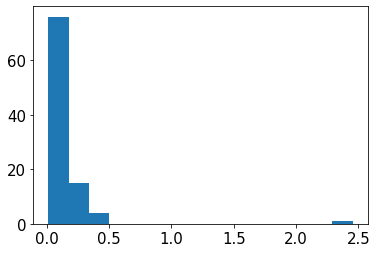

In [46]:
plt.hist(mass_frac_rhap,bins=15)
print(np.where(mass_frac_rhap>0.3))

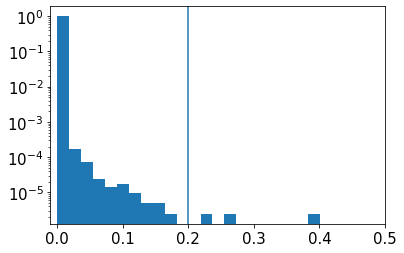

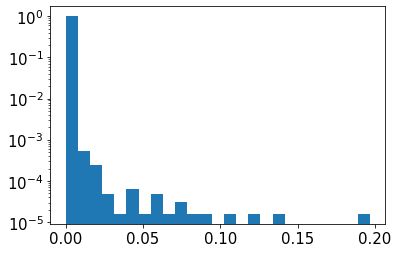

In [764]:
frq, edges = np.histogram(rhap_sub_masses,bins=120)
plt.bar(edges[:-1], frq/len(rhap_sub_masses), width=np.diff(edges), align="edge")
plt.yscale('log')
plt.axvline(0.2)
plt.xlim(-0.01,0.5)
plt.show()

frq, edges = np.histogram(mwm_sub_masses,bins=25)
plt.bar(edges[:-1], frq/len(mwm_sub_masses), width=np.diff(edges), align="edge")
plt.yscale('log')
plt.show()

In [325]:
cut1 = np.where(np.log10(df_all['calc_spin'])>-.5)
cut1 = list(cut1[0])
print(cut1)
df_all=df_all.drop(cut1).reset_index(drop=True)
df_ns=df_ns.drop(cut1).reset_index(drop=True)
df_og_mmmz=df_og_mmmz.drop(cut1).reset_index(drop=True)
mass_ratio_mmmz = mass_ratio_mmmz.drop(cut1).reset_index(drop=True)
mass_frac_mmmz = mass_frac_mmmz.drop(cut1).reset_index(drop=True)
mwm_25_mass_scale = np.delete(mwm_25_mass_scale,cut1)
mwm_50_mass_scale = np.delete(mwm_50_mass_scale,cut1)
mwm_70_mass_scale = np.delete(mwm_70_mass_scale,cut1)
mwm_90_mass_scale = np.delete(mwm_90_mass_scale,cut1)


#cut2 = np.where(mass_ratio_mmmz>.2)
#print(cut2[0])
#df_all=df_all.drop(cut2[0]).reset_index()
#df_ns=df_ns.drop(cut2[0]).reset_index()
#df_og_mmmz=df_og_mmmz.drop(cut2[0]).reset_index()
#mass_frac_mmmz = mass_frac_mmmz.drop(cut2[0]).reset_index()
#mass_ratio_mmmz = mass_ratio_mmmz.drop(cut2[0]).reset_index()
#mwm_25_mass_scale = np.delete(mwm_25_mass_scale,cut2[0])
#mwm_50_mass_scale = np.delete(mwm_50_mass_scale,cut2[0])
#mwm_70_mass_scale = np.delete(mwm_70_mass_scale,cut2[0])
#mwm_90_mass_scale = np.delete(mwm_90_mass_scale,cut2[0])


#cut1 = np.where(np.log10(df_all['calc_spin'])>-.5)
#print(cut1[0][0])
#df_all_rhap_rm=df_all_rhap_rm.drop(cut1[0][0])
#df_ns_rhap_rm=df_ns_rhap_rm.drop(cut1[0][0])
#df_all_rhap_rock=df_all_rhap_rock.drop(cut1[0][0])
#mass_ratio_rhap = mass_ratio_rhap.drop(cut1[0][0])


cut2 = np.where(mass_ratio_rhap>.2)
print(cut2[0])
df_all_rhap_rm=df_all_rhap_rm.drop(cut2[0]).reset_index(drop=True)
df_ns_rhap_rm=df_ns_rhap_rm.drop(cut2[0]).reset_index(drop=True)
df_all_rhap_rock=df_all_rhap_rock.drop(cut2[0]).reset_index(drop=True)
mass_ratio_rhap = mass_ratio_rhap.drop(cut2[0]).reset_index(drop=True)
mass_frac_rhap = mass_frac_rhap.drop(cut2[0]).reset_index(drop=True)
df_ns_rhap_rm_new_rvir = df_ns_rhap_rm_new_rvir.drop(cut2[0]).reset_index(drop=True)
rhap_25_mass_scale = np.delete(rhap_25_mass_scale,cut2[0])
rhap_50_mass_scale = np.delete(rhap_50_mass_scale,cut2[0])
rhap_70_mass_scale = np.delete(rhap_70_mass_scale,cut2[0])
rhap_90_mass_scale = np.delete(rhap_90_mass_scale,cut2[0])
rhap_no_norm_shape = np.delete(rhap_no_norm_shape,cut2[0])
rhap_host_shape_no_norm = np.delete(rhap_host_shape_no_norm,cut2[0])
rhap_host_shape_no_norm_1it = np.delete(rhap_no_norm_shape_1_it,cut2[0])
recalc_rvir = np.delete(recalc_rvir,cut2[0])
recalc_mvir = np.delete(recalc_mvir,cut2[0])

[]
[20 46 63 76]


In [349]:
1*u.kpc.to(u.km)

3.085677581491367e+16

In [356]:
def get_vvir(Mvir, Rvir):
    #from definition of circular velocity
    #velocity output in km/s
    g = G.to(u.kpc**3/u.solMass/u.s**2)
    convert = 1*u.kpc.to(u.km) #convert from kpc to km
    v = np.sqrt(g*Mvir*u.solMass/(Rvir*u.kpc))
    return v*convert

In [357]:
print(get_vvir(np.array(df_og_mmmz['mvir']),np.array(df_og_mmmz['rvir'])))

[137.30421491 139.26803506 135.59168836 142.09912002 137.38901303
 139.3406807  136.20175516 136.77584768 137.48545231 139.39898739
 136.21350499 136.89078925 140.16766295 149.44953175 139.47248594
 136.76036034 135.21550729 141.56216963 136.45729097 138.8825956
 139.7205514  136.2850611  144.20389077 138.66284076 140.55683582
 137.13866911 141.12302656 143.36283566 147.52559587 142.07862011
 140.79234033 139.92620236 137.75185241 141.86066161 141.69334719
 136.4792573  138.33966637 139.55012728 137.13726044 141.58324129
 140.05427047 143.14233802 139.12881677] kpc / s


In [40]:
#for hlist
names =['scale','ID','desc_scale','desc_id','num_prog','pid','upid','desc_pid',
    'phantom','sam_mvir','Mvir','Rvir','Rs', 'vrms', 'mmp', 'scale_of_last_MM',
    'Vmax', 'X','Y','Z','VX','VY','VZ','JX','JY','JZ','Spin','Breadth_first_ID',
    'Depth_first_ID','Tree_root_ID','Orig_halo_ID','Snap_num',
    'Next_coprogenitor_depthfirst_ID','Last_progenitor_depthfirst_ID',
    'Rs_Klypin','Mvir_all','M200b','M200c','M500c','M2500c','Xoff','Voff',
    'spin_bullock','b_to_a','c_to_a','A[x]','A[y]','A[z]','b_to_a(500c)',
    'c_to_a(500c)','A[x](500c)','A[y](500c)','A[z](500c)','T/|U|','Macc',
    'Mpeak','Vacc','Vpeak','Halfmass_Scale','Acc_Rate_Inst','Acc_Rate_100Myr',
    'Acc_Rate_Tdyn']

halo_names = []
host_ids = []
with open('hlist_halo_ids.txt') as f:
    for l in f:
        j = 0
        this_halo, host_id = l.split()#, block, _ = l.split()
        halo_names.append(this_halo)
        host_ids.append(host_id)
        j+=1 

In [41]:
for i,halo in enumerate(halo_names):
    #hostvalues = ascii.read('/Users/lmezini/proj_2/Halos_Recalculated/{}/out_0.list'.format(halo), format = 'commented_header')
    hostvalues = ascii.read('/Users/lmezini/proj_2/rs_files/Halo{}/hlist.list'.format(halo),names=names)
    loc = int(np.where(hostvalues['ID']==int(host_ids[i]))[0][0])


In [73]:
np.histogram(np.log10(hostvalues['Mvir'][1:]),bins=4)

(array([44752, 15595,   731,    21]),
 array([ 5.7512791 ,  7.30068477,  8.85009043, 10.3994961 , 11.94890176]))

In [14]:
def get_med_shift_err(w_sub,wo_sub,n_smpls,n_boot = 1000):
    med_diffs = np.zeros(n_boot)
    for i in range(n_boot):
        w_sub_smpls = random.choices(np.array(w_sub),k=n_smpls)
        wo_sub_smpls = random.choices(np.array(wo_sub),k=n_smpls)
        med_diffs[i] += (np.median(w_sub_smpls)-np.median(wo_sub_smpls))/np.median(w_sub_smpls)
    return np.std(med_diffs, ddof=1)

45
MannwhitneyuResult(statistic=1495.0, pvalue=0.00010041140355440108)
11.909956605234079 5.344137156754728
15.529110711904435 5.577768090385526
MannwhitneyuResult(statistic=1115.0, pvalue=0.41044575851942355)
0.5811771154166128 0.18743281623568003
0.5871800051812482 0.1654709868184101
MannwhitneyuResult(statistic=669.0, pvalue=0.0056417509126853475)
-1.564942073342813 0.32379881019986967
-1.7364482238058019 0.3675452210417809


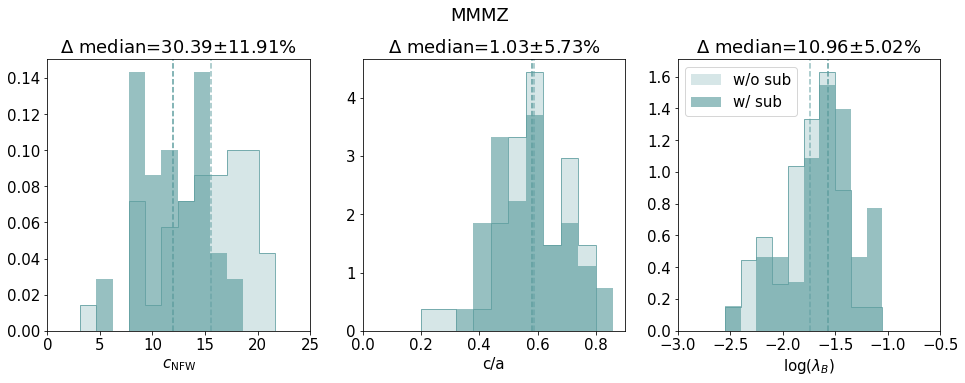

In [326]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
n_samples = len(df_all)
print(n_samples)

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('MMMZ',y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
color = 'cadetblue'
bins = np.arange(0,25.0,1.55)

ax1.hist(df_ns['calc_cs'],alpha=0.25,bins = bins,label='Subs Excluded',density=True,color=color)
ax1.hist(df_ns['calc_cs'],alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax1.hist(df_all['calc_cs'],alpha=0.65,bins = bins,density=True,label='Subs Included',color=color)
ax1.set_xlim(0,25)
#ax1.hist(df_all['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color=color)
#ax1.hist(df_ns['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color=color)
ax1.axvline(np.median(df_all['calc_cs']),linestyle = '--',color=color)
ax1.axvline(np.median(df_ns['calc_cs']),linestyle = '--',color=color,alpha=0.65)
diff = -100*(np.median((df_all['calc_cs']))-np.median((df_ns['calc_cs'])))/np.median((df_all['calc_cs']))

print(mannwhitneyu(df_ns['calc_cs'], df_all['calc_cs']))
print(np.median(df_all['calc_cs']),iqr((df_all['calc_cs'])))
print(np.median(df_ns['calc_cs']),iqr((df_ns['calc_cs'])))


err_margin = 100*get_med_shift_err(df_all['calc_cs'],df_ns['calc_cs'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,2),round(err_margin,2))

ax1.set_title(textstr)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)

bins = np.arange(0.2,0.9,0.06)
ax2.hist(df_ns['calc_shape'],alpha=0.25,bins=bins,density=True,label='w/o sub',color=color)
ax2.hist(df_ns['calc_shape'],alpha=0.8,bins=bins,density=True,color=color,histtype='step')
ax2.hist(df_all['calc_shape'],alpha=0.65,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_all['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_ns['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,label='w/o sub',color=color)
ax2.axvline(np.median(df_all['calc_shape']),linestyle = '--',color=color)
ax2.axvline(np.median(df_ns['calc_shape']),linestyle = '--',color=color,alpha=0.65)

print(mannwhitneyu(df_ns['calc_shape'], df_all['calc_shape']))
print(np.median(df_all['calc_shape']),iqr((df_all['calc_shape'])))
print(np.median(df_ns['calc_shape']),iqr((df_ns['calc_shape'])))

diff = -100*(np.median((df_all['calc_shape']))-np.median((df_ns['calc_shape'])))/np.median((df_all['calc_shape']))
err_margin = 100*get_med_shift_err((df_all['calc_shape']),(df_ns['calc_shape']),n_smpls=43)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,2),round(err_margin,2))
ax2.set_xlim(0.0,0.9)
ax2.set_title(textstr)
ax2.set_xlabel('c/a')

bins = np.arange(-3.0,-1,0.15)
ax3.hist(np.log10(df_ns['calc_spin']),alpha=0.25,bins = bins, label='w/o sub',density=True,color=color)
ax3.hist(np.log10(df_ns['calc_spin']),alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax3.hist(np.log10(df_all['calc_spin']),alpha=0.65,bins = bins,density=True,label='w/ sub',color=color)
#ax3.hist(np.log10(df_all['calc_spin']),histtype='step',alpha=0.5,bins = bins,density=True,color=color)
#ax3.hist(np.log10(df_ns['calc_spin']),histtype='step',alpha=0.5,bins = bins,density=True,color=color)
ax3.axvline(np.median(np.log10(df_all['calc_spin'])),linestyle = '--',color=color)
ax3.axvline(np.median(np.log10(df_ns['calc_spin'])),linestyle = '--',color=color,alpha=0.65)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
#diff = 100*(np.median(np.log10(df_all['calc_spin']))-np.median(np.log10(df_ns['calc_spin'])))/np.median(np.log10(df_all['calc_spin']))

print(mannwhitneyu(np.log10(df_ns['calc_spin']), np.log10(df_all['calc_spin'])))
print(np.median(np.log10(df_all['calc_spin'])),iqr(np.log10(df_all['calc_spin'])))
print(np.median(np.log10(df_ns['calc_spin'])),iqr(np.log10(df_ns['calc_spin'])))

diff = -100*(np.median(np.log10(df_all['calc_spin']))-np.median(np.log10(df_ns['calc_spin'])))/np.median(np.log10(df_all['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all['calc_spin']),np.log10(df_ns['calc_spin']),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,2),round(err_margin,2))
ax3.set_xlim(-3.,-0.5)
ax3.set_title(textstr)
ax3.legend()
#plt.savefig('mwm_host_ws_wos_compare.png',bbox_inches='tight')

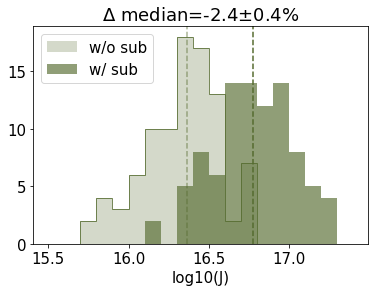

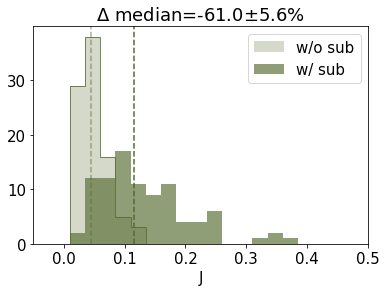

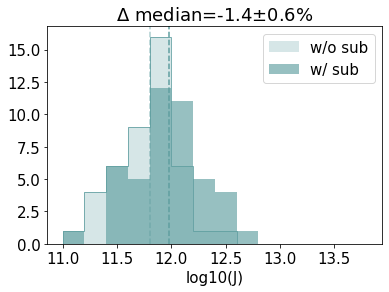

MannwhitneyuResult(statistic=675.0, pvalue=0.006538286039685845)
all med, iqr:  0.08128324458702609 0.06833107255121403
host med, iqr:  0.055184203679459316 0.0499676569943396


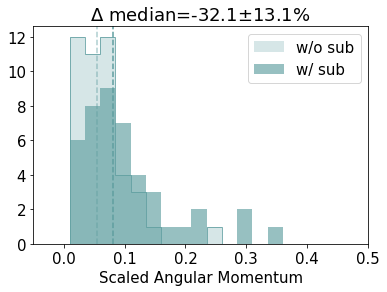

In [329]:
G = 4.302*(10**-9.) # in Mpc Msun^-1 (km/s)^2 
h = 0.7
threshold_density = 94*2.7754e11*h**2 #94 x critical density ##M_sun/Mpc**3##


color='darkolivegreen'
spin_unscale_all = df_all_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
spin_unscale_host = df_ns_rhap_rm_new_rvir['calc_spin']*(np.sqrt(2.*G*recalc_mvir**3.*recalc_rvir))

bins = np.arange(15.5,17.5,0.10)
plt.figsize=(5,5)
plt.hist(np.log10(spin_unscale_host),bins=bins,label='w/o sub',color=color,alpha=0.25)
plt.hist(np.log10(spin_unscale_host),bins=bins,histtype='step',color=color,alpha=0.8)
plt.hist(np.log10(spin_unscale_all),bins=bins,label='w/ sub',color=color,alpha=0.65)
plt.xlabel('log10(J)')
plt.legend()
diff = -100*(np.median(np.log10(spin_unscale_all))-np.median(np.log10(spin_unscale_host)))/np.median(np.log10(spin_unscale_all))
err_margin = 100*get_med_shift_err(np.log10(spin_unscale_all),np.log10(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median(np.log10(spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median(np.log10(spin_unscale_all)),linestyle = '--',color=color)
plt.show()

fixed_r = 1.7 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
fixed_scale = (np.sqrt(2.*G*fixed_m**3.*fixed_r))
spin_unscale_all = df_all_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
spin_unscale_host = df_ns_rhap_rm_new_rvir['calc_spin']*(np.sqrt(2.*G*recalc_mvir**3.*recalc_rvir))


spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale

plt.figsize=(5,5)

bins = np.arange(0.01,.5,0.025)
plt.hist(spin_unscale_host,bins=bins,label='w/o sub',color=color,alpha=0.25)
plt.hist(spin_unscale_host,bins=bins,histtype='step',color=color,alpha=0.8)
plt.hist(spin_unscale_all,bins=bins,label='w/ sub',color=color,alpha=0.65)

plt.xlabel('J')
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median((spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median((spin_unscale_all)),linestyle = '--',color=color)
plt.xlim(-.05,.5)
#plt.savefig('rhap_ang_mom_ws_wos_compare_modified_rvir.png',bbox_inches = 'tight')
plt.show()

##### OG HOST RVIR #######

color='cadetblue'
spin_unscale_host = df_ns['calc_spin']*(np.sqrt(2.*G*df_og_mmmz['mvir']**3.*df_og_mmmz['rvir']*1e-3))
spin_unscale_all = df_all['calc_spin']*(np.sqrt(2.*G*df_og_mmmz['mvir']**3.*df_og_mmmz['rvir']*1e-3))

plt.figsize=(5,5)

bins = np.arange(11.0,14.0,.2)
plt.hist(np.log10(spin_unscale_host),label='w/o sub',color=color,alpha=0.25,bins=bins)
plt.hist(np.log10(spin_unscale_host),histtype='step',color=color,alpha=0.8,bins=bins)
plt.hist(np.log10(spin_unscale_all),label='w/ sub',color=color,alpha=0.65,bins=bins)

plt.xlabel('log10(J)')
plt.legend()
diff = -100*(np.median(np.log10(spin_unscale_all))-np.median(np.log10(spin_unscale_host)))/np.median(np.log10(spin_unscale_all))
err_margin = 100*get_med_shift_err(np.log10(spin_unscale_all),np.log10(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median(np.log10(spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median(np.log10(spin_unscale_all)),linestyle = '--',color=color)
plt.show()


fixed_r = 0.2 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
fixed_scale = np.sqrt(2.*G*fixed_m**3.*fixed_r)

spin_unscale_host = df_ns['calc_spin']*(np.sqrt(2.*G*df_og_mmmz['mvir']**3.*df_og_mmmz['rvir']*1e-3))
spin_unscale_all = df_all['calc_spin']*(np.sqrt(2.*G*df_og_mmmz['mvir']**3.*df_og_mmmz['rvir']*1e-3))
spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale
print(mannwhitneyu(spin_unscale_host, spin_unscale_all))

plt.figsize=(5,5)
bins = np.arange(0.01,.5,0.025)
plt.hist(spin_unscale_host,label='w/o sub',color=color,alpha=0.25,bins=bins)
plt.hist(spin_unscale_host,histtype='step',color=color,alpha=0.8,bins=bins)
plt.hist(spin_unscale_all,label='w/ sub',color=color,bins=bins,alpha=0.65)
plt.xlabel('Scaled Angular Momentum')
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median(spin_unscale_host),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median(spin_unscale_all),linestyle = '--',color=color)
print("all med, iqr: ",np.median(spin_unscale_all),iqr(spin_unscale_all))
print("host med, iqr: ",np.median(spin_unscale_host),iqr(spin_unscale_host))

plt.xlim(-.05,.5)
#plt.savefig('rhap_ang_mom_ws_wos_compare.png',bbox_inches = 'tight')
plt.show()

45


Text(0.5, 0, 'log($\\lambda_{B}$)')

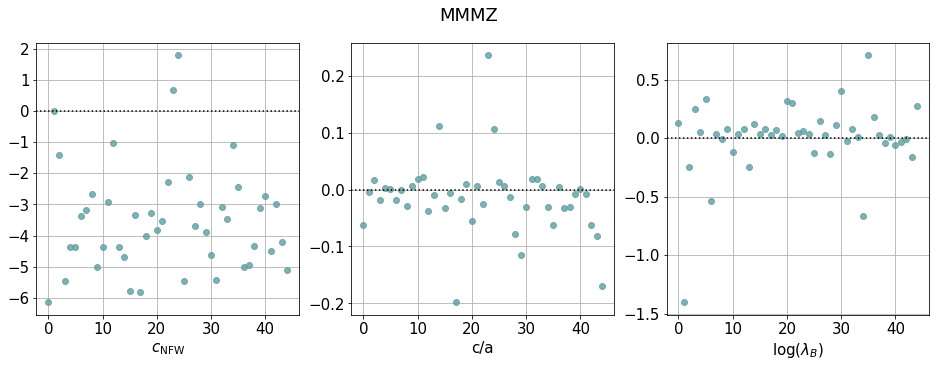

In [265]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
n_samples = len(df_all)
print(n_samples)

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('MMMZ')#,y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
color = 'cadetblue'

ax1.plot(df_all['calc_cs']-df_ns['calc_cs'],alpha=0.8,marker='o',ls='none',color=color)
ax1.axhline(0.,color='black',ls=':')
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)
ax1.grid(True)

ax2.plot(df_all['calc_shape']-df_ns['calc_shape'],alpha=0.8,marker='o',ls='none',color=color)
ax2.axhline(0.,color='black',ls=':')
ax2.grid(True)
ax2.set_xlabel('c/a',fontsize=15)

ax3.plot(np.log10(df_all['calc_spin'])-np.log10(df_ns['calc_spin']),alpha=0.8,marker='o',ls='none',color=color)
ax3.axhline(0.,color='black',ls=':')
ax3.grid(True)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)


#plt.savefig('mwm_host_ws_wos_compare.png',bbox_inches='tight')

In [131]:
def correct_c(w_subs,sub_mass,data = 'mw'):
    if data == 'mw':
        correction = 0.771*sub_mass + 0.276 #0.2 cut
        #correction = 0.823*sub_mass + 0.242
        correction = 2.232*sub_mass + 0.212 #binned
        #correction = 1.44*sub_mass + 0.225 #no cut
        #correction = 0.959*sub_mass + 0.261 #no cut, no bin


    elif data == 'rhap':

        correction = 2.396*sub_mass+0.288 #0.2 sub mass cutoff, binned
        correction = 2.22*sub_mass + 0.334 #0.5 sub mass cutoff, no bin

    return w_subs+correction*w_subs

def correct_shape(w_subs,sub_mass,data = 'mw'):
    if data == 'mw':
        correction =  0.653*sub_mass +0.003
        correction =  0.662*sub_mass + 0.021 #0.2 cut binned
        correction = 1.036*sub_mass -0.0314 #0.2 cut binned
        #correction = 0.695*sub_mass -0.0124
        #correction = 0.641*sub_mass -0.00724 #no cut, no bin
        
    elif data == 'rhap':
        correction = 0.745*sub_mass-0.037 #0.2 sub mass cutoff, binned
        correction = 0.852*sub_mass - 0.0512 #0.5 sub mass cutoff, no bin

    return w_subs+correction*w_subs


def correct_spin(w_subs,sub_mass,data = 'mw'):
    if data == 'mw':
        correction = 0.994 * sub_mass + 0.127 #0.2 cut
        #correction = 1.044 * sub_mass + 0.089
        correction = 0.924 * sub_mass + 0.114 #0.2 cut binned
        #correction = 0.851 * sub_mass + 0.127 #no cut
        #correction = 1.12*sub_mass + 0.112 #no cut, no bin

    elif data == 'rhap':
        correction = 0.895*sub_mass +0.061 #0.2 sub mass cutoff binned
        correction = 1.02*sub_mass + 0.0475 #0.5 sub mass cutoff, no bin

    return w_subs + correction*w_subs



RMSE:  1.75
med change:  0.003215921593305355


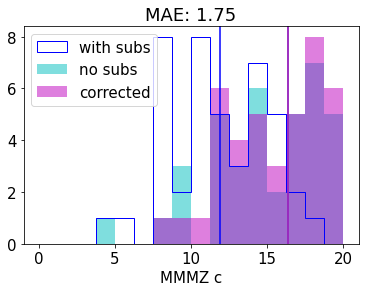

RMSE:  0.07637
med change:  0.004179308677425754


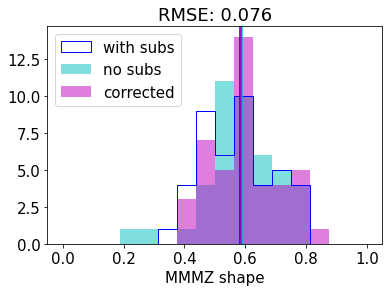

RMSE:  0.215
med change:  -0.008173036363553663


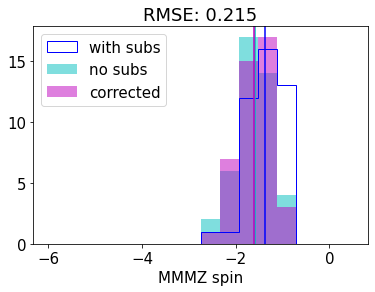

In [196]:
bins = np.linspace(0,20,17)
plt.hist((df_all['calc_cs']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all['calc_cs'])),color='b')
plt.hist((df_ns['calc_cs']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns['calc_cs'])),color='c')
corrected_c = correct_c(df_all['calc_cs'],mass_frac_mmmz)
plt.hist(correct_c(df_all['calc_cs'],mass_frac_mmmz),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_c((df_all['calc_cs']),mass_frac_mmmz)),color='m')
plt.legend()
plt.title('MAE: {}'.format(round(mean_squared_error(df_ns['calc_cs'],corrected_c,squared=False),3)))
plt.xlabel('MMMZ c')
print('RMSE: ',round(mean_squared_error(df_ns['calc_cs'],corrected_c,squared=False),3))
print('med change: ',(np.median(df_ns['calc_cs'])-np.median(corrected_c))/np.median(df_ns['calc_cs']))
plt.show()

bins = np.linspace(0,1,17)
plt.hist((df_all['calc_shape']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all['calc_shape'])),color='b')
plt.hist((df_ns['calc_shape']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns['calc_shape'])),color='c')
corrected_shape=correct_shape((df_all['calc_shape']),mass_frac_mmmz)
plt.hist(correct_shape((df_all['calc_shape']),mass_frac_mmmz),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_shape((df_all['calc_shape']),mass_frac_mmmz)),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(df_ns['calc_shape'],corrected_shape,squared=False),3)))
plt.xlabel('MMMZ shape')
print('RMSE: ',round(mean_squared_error(df_ns['calc_shape'],corrected_shape,squared=False),5))
print('med change: ',(np.median(df_ns['calc_shape'])-np.median(corrected_shape))/np.median(df_ns['calc_shape']))
plt.show()



bins = np.linspace(-6,0.5,17)
plt.hist(np.log10(df_all['calc_spin']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median(np.log10(df_all['calc_spin'])),color='b')
plt.hist(np.log10(df_ns['calc_spin']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median(np.log10(df_ns['calc_spin'])),color='c')
corrected_spin = correct_spin(np.log10(df_all['calc_spin']),mass_frac_mmmz)
plt.hist(correct_spin(np.log10(df_all['calc_spin']),mass_frac_mmmz),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_spin(np.log10(df_all['calc_spin']),mass_frac_mmmz)),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(np.log10(df_ns['calc_spin']),corrected_spin,squared = False),3)))
print('RMSE: ',round(mean_squared_error(np.log10(df_ns['calc_spin']),corrected_spin,squared = False),3))
print('med change: ',(np.median(np.log10(df_ns['calc_spin']))-np.median(corrected_spin))/np.median(np.log10(df_ns['calc_spin'])))
plt.xlabel('MMMZ spin')
plt.show()


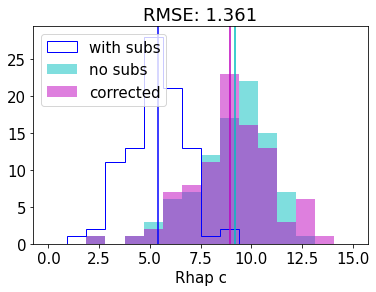

RMSE: 1.361
med change:  0.027884220089579314



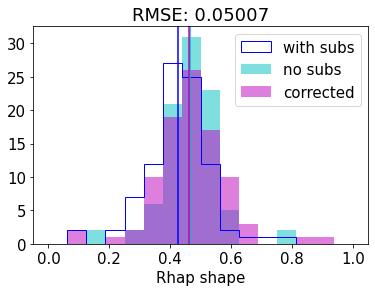

RMSE: 0.05007
med change:  0.008368687047845422

RMSE:  0.273
med change:  0.03261497733129454


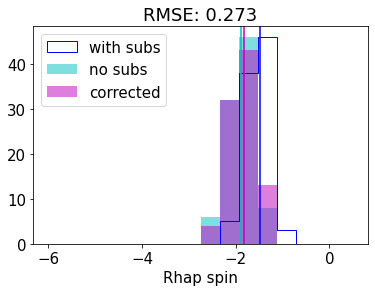

In [202]:
bins = np.linspace(0,15,17)
plt.hist((df_all_rhap_rm['calc_cs']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all_rhap_rm['calc_cs'])),color='b')
plt.hist((df_ns_rhap_rm['calc_cs']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns_rhap_rm['calc_cs'])),color='c')

corrected_c = correct_c(df_all_rhap_rm['calc_cs'],mass_frac_rhap,'rhap')
plt.hist(corrected_c,alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_c((df_all_rhap_rm['calc_cs']),mass_frac_rhap,'rhap')),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_cs'],corrected_c,squared=False),3)))
plt.xlabel('Rhap c')
plt.show()
print('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_cs'],corrected_c,squared=False),3)))
print('med change: ',(np.median(df_ns_rhap_rm['calc_cs'])-np.median(corrected_c))/np.median(df_ns_rhap_rm['calc_cs']))
print()

bins = np.linspace(0,1,17)
plt.hist((df_all_rhap_rm['calc_shape']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all_rhap_rm['calc_shape'])),color='b')
plt.hist((df_ns_rhap_rm['calc_shape']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns_rhap_rm['calc_shape'])),color='c')


corrected_shape = correct_shape(df_all_rhap_rm['calc_shape'],mass_frac_rhap,'rhap')
plt.hist(correct_shape((df_all_rhap_rm['calc_shape']),mass_frac_rhap,'rhap'),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_shape(df_all_rhap_rm['calc_shape'],mass_frac_rhap,'rhap')),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_shape'],corrected_shape,squared=False),5)))
plt.xlabel('Rhap shape')
plt.show()

print('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_shape'],corrected_shape,squared=False),5)))
print('med change: ',(np.median(df_ns_rhap_rm['calc_shape'])-np.median(corrected_shape))/np.median(df_ns_rhap_rm['calc_shape']))

print()
bins = np.linspace(-6,0.5,17)
plt.hist(np.log10(df_all_rhap_rm['calc_spin']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median(np.log10(df_all_rhap_rm['calc_spin'])),color='b')
plt.hist(np.log10(df_ns_rhap_rm['calc_spin']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median(np.log10(df_ns_rhap_rm['calc_spin'])),color='c')

corrected_spin = correct_spin(np.log10(df_all_rhap_rm['calc_spin']),mass_frac_rhap,'rhap')
plt.hist(correct_spin(np.log10(df_all_rhap_rm['calc_spin']),mass_frac_rhap,'rhap'),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_spin(np.log10(df_all_rhap_rm['calc_spin']),mass_frac_rhap,'rhap')),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(np.log10(df_ns_rhap_rm['calc_spin']),corrected_spin,squared = False),3)))
print('RMSE: ',round(mean_squared_error(np.log10(df_ns_rhap_rm['calc_spin']),corrected_spin,squared = False),3))
print('med change: ',(np.median(np.log10(df_ns_rhap_rm['calc_spin']))-np.median(corrected_spin))/np.median(np.log10(df_ns_rhap_rm['calc_spin'])))
plt.xlabel('Rhap spin')
plt.show()



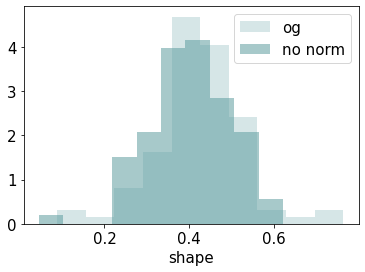

no norm:  0.4033548553207907 og:  0.4233229206506041


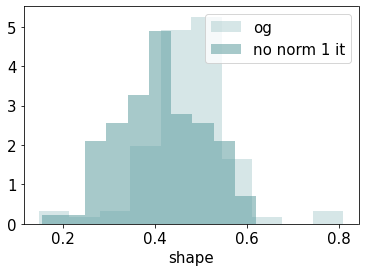

no norm:  0.40744988863637494 og:  0.4752462668339747


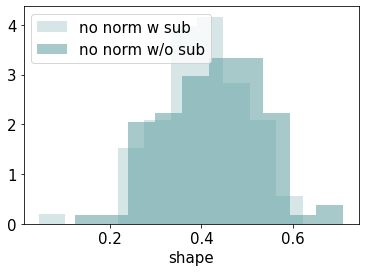

med change %:  -6.838990023472495


MannwhitneyuResult(statistic=4827.0, pvalue=0.09981139497650851)

In [166]:
plt.hist(df_all_rhap_rm['calc_shape'],alpha=0.25,density=True,color=color,label='og')
plt.hist(rhap_no_norm_shape,alpha=0.55,density=True,label='no norm',color=color)
plt.xlabel('shape')
plt.legend()
plt.show()

print('no norm: ',np.median(rhap_no_norm_shape),'og: ',np.median(df_all_rhap_rm['calc_shape']))
mannwhitneyu(rhap_no_norm_shape, df_all_rhap_rm['calc_shape'],alternative='less')

plt.hist(df_ns_rhap_rm['calc_shape'],alpha=0.25,density=True,label='og',color=color)
plt.hist(rhap_host_shape_no_norm_1it,alpha=0.55,density=True,label='no norm 1 it',color=color)
plt.legend()
plt.xlabel('shape')
plt.show()

print('no norm: ',np.median(rhap_host_shape_no_norm_1it),'og: ',np.median(df_ns_rhap_rm['calc_shape']))
mannwhitneyu(rhap_host_shape_no_norm, df_ns_rhap_rm['calc_shape'],alternative='less')

plt.hist(rhap_no_norm_shape,alpha=0.25,density=True,label='no norm w sub',color=color)
plt.hist(rhap_host_shape_no_norm,alpha=0.55,density=True,label='no norm w/o sub',color=color)
plt.legend()
plt.xlabel('shape')
plt.show()

print('med change %: ',100*(np.median(rhap_no_norm_shape)-np.median(rhap_host_shape_no_norm))/np.median(rhap_no_norm_shape))
mannwhitneyu(rhap_host_shape_no_norm, rhap_no_norm_shape)



In [134]:
no_norm_part_removed = np.load('particles_removed_no_norm.npy')
w_norm_part_removed = np.load('particles_removed_w_norm.npy')

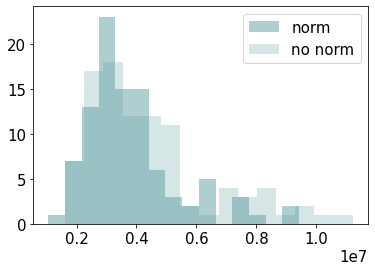

norm:  6.531350717383451 no norm:  6.58908618341935


In [161]:
plt.hist(w_norm_part_removed,color='cadetblue',alpha=0.5,label='norm',bins=15)
plt.hist(no_norm_part_removed,alpha=0.25,color='cadetblue',label='no norm',bins=15)
plt.legend()
plt.show()
print('norm: ',np.log10(np.median(w_norm_part_removed)),'no norm: ',np.log10(np.median(no_norm_part_removed)))


MannwhitneyuResult(statistic=7910.0, pvalue=2.4228362960789422e-24)
all med, iqr:  5.406746542371018 1.9058912011002445
host med, iqr:  9.20832754515128 2.4562215510373475
MannwhitneyuResult(statistic=5390.0, pvalue=0.001353747988382264)
all med, iqr:  0.42515325946367666 0.10718027031375077
host med, iqr:  0.4663490746310843 0.0886116744545899
MannwhitneyuResult(statistic=1309.0, pvalue=5.945585539849897e-16)
all med, iqr:  -1.4918370349320984 0.2812732911927083
host med, iqr:  -1.8866232647734549 0.3038638118964918


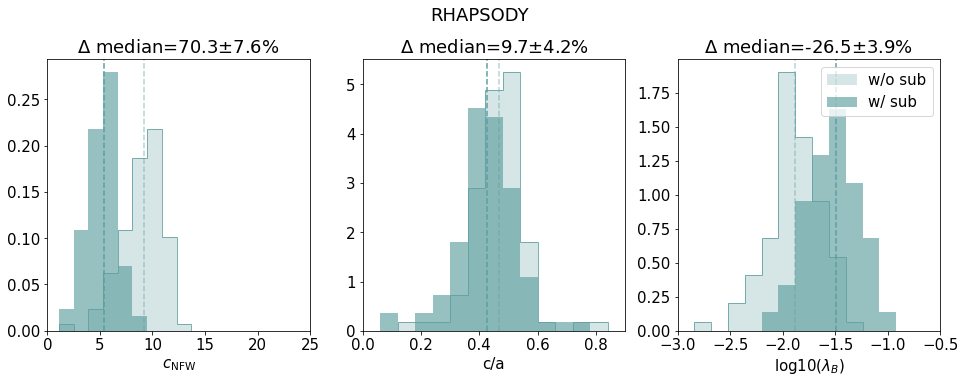

In [260]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
color='cadetblue'
n_samples = len(df_all_rhap_rm)
rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('RHAPSODY',y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
bins = np.arange(min(df_all_rhap_rm['calc_cs']),15.0,1.4)

ax1.hist(df_ns_rhap_rm['calc_cs'],alpha=0.25,bins = bins,label='Subs Excluded',density=True,color=color)
ax1.hist(df_ns_rhap_rm['calc_cs'],alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax1.hist(df_all_rhap_rm['calc_cs'],alpha=0.65,bins = bins,density=True,label='Subs Included',color=color)
#ax1.hist(df_all_rhap_rm['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#810f7c')
#ax1.hist(df_ns_rhap_rm['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#74a9cf')
ax1.axvline(np.median(df_all_rhap_rm['calc_cs']),linestyle = '--',color=color)
ax1.axvline(np.median(df_ns_rhap_rm['calc_cs']),linestyle = '--',color=color,alpha=0.45)
ax1.set_xlim(0,25)

print(mannwhitneyu(df_ns_rhap_rm['calc_cs'], df_all_rhap_rm['calc_cs']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_cs']),iqr((df_all_rhap_rm['calc_cs'])))
print("host med, iqr: ",np.median(df_ns_rhap_rm['calc_cs']),iqr((df_ns_rhap_rm['calc_cs'])))


diff = 100*(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm['calc_cs']))/np.median(df_all_rhap_rm['calc_cs'])
err1 = np.sqrt( np.std(df_all_rhap_rm['calc_cs'])**2 + np.std(df_ns_rhap_rm['calc_cs'])**2 )
err2 = diff*np.sqrt( (err1/(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm['calc_cs'])))**2+ (np.std(df_all_rhap_rm['calc_cs'])/np.median(df_all_rhap_rm['calc_cs']))**2 )
diff = -100*(np.median((df_all_rhap_rm['calc_cs']))-np.median((df_ns_rhap_rm['calc_cs'])))/np.median((df_all_rhap_rm['calc_cs']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm['calc_cs'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))

ax1.set_title(textstr)#,fontsize=15)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)

bins = np.arange(0.0,0.9,0.06)
ax2.hist(df_ns_rhap_rm['calc_shape'],alpha=0.25,bins=bins,density=True,label='w/o sub',color=color)
ax2.hist(df_ns_rhap_rm['calc_shape'],alpha=0.8,bins=bins,density=True,label='w/o sub',color=color,histtype='step')
ax2.hist(df_all_rhap_rm['calc_shape'],alpha=0.65,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_all_rhap_rm['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax2.hist(df_ns_rhap_rm['calc_shape'],histtype='step',alpha=0.25,bins=bins,density=True,color='#74a9cf')
ax2.axvline(np.median(df_all_rhap_rm['calc_shape']),linestyle = '--',color=color)
ax2.axvline(np.median(df_ns_rhap_rm['calc_shape']),linestyle = '--',color=color,alpha=0.45)
diff = 100*(np.median(df_all_rhap_rm['calc_shape'])-np.median(df_ns_rhap_rm['calc_shape']))/np.median(df_all_rhap_rm['calc_shape'])
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_xlim(0.,0.9)

print(mannwhitneyu(df_ns_rhap_rm['calc_shape'], df_all_rhap_rm['calc_shape']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_shape']),iqr(df_all_rhap_rm['calc_shape']))
print("host med, iqr: ",np.median(df_ns_rhap_rm['calc_shape']),iqr(df_ns_rhap_rm['calc_shape']))

diff = -100*(np.median((df_all_rhap_rm['calc_shape']))-np.median((df_ns_rhap_rm['calc_shape'])))/np.median((df_all_rhap_rm['calc_shape']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm['calc_shape'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))

ax2.set_title(textstr)#,fontsize=15)

bins = np.arange(-3.0,-0.5,0.16)
ax3.hist(np.log10(df_ns_rhap_rm['calc_spin']),alpha=0.25,bins=bins,label='w/o sub',density=True,color=color)
ax3.hist(np.log10(df_ns_rhap_rm['calc_spin']),alpha=.8,bins=bins,density=True,color=color,histtype='step')
ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),alpha=.65,bins=bins,density=True,label='w/ sub',color=color)

#ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax3.hist(np.log10(df_ns_rhap_rm['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#74a9cf')
ax3.set_xlabel('log10($\lambda_{B}$)',fontsize=15)

cut = np.argsort(rhap_mass_scale)[0:n_samples]

print(mannwhitneyu(np.log10(df_ns_rhap_rm['calc_spin']), np.log10(df_all_rhap_rm['calc_spin'])))
print("all med, iqr: ",np.median(np.log10(df_all_rhap_rm['calc_spin'])),iqr(np.log10(df_all_rhap_rm['calc_spin'])))
print("host med, iqr: ",np.median(np.log10(df_ns_rhap_rm['calc_spin'])),iqr(np.log10(df_ns_rhap_rm['calc_spin'])))

ax3.axvline(np.median(np.log10(df_all_rhap_rm['calc_spin'])),linestyle = '--',color=color)
ax3.axvline(np.median(np.log10(df_ns_rhap_rm['calc_spin'])),linestyle = '--',color=color,alpha=0.45)
#diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))

diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm['calc_spin']),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
ax3.set_xlim(-3,-0.5)
ax3.set_title(textstr)
ax3.legend()
plt.savefig('rhap_host_ws_wos_rm_compare.png',bbox_inches='tight')

MannwhitneyuResult(statistic=6990.0, pvalue=2.2819241535727197e-14)
all med, iqr:  5.406746542371018 1.9058912011002445
host med, iqr:  7.51127116006088 2.31509937858186
MannwhitneyuResult(statistic=5214.0, pvalue=0.00658546984476499)
all med, iqr:  0.42515325946367666 0.10718027031375077
host med, iqr:  0.46786747258427597 0.07666250792522405
MannwhitneyuResult(statistic=7206.0, pvalue=1.8471121356351126e-16)
all med, iqr:  -1.4918370349320984 0.2812732911927083
host med, iqr:  -1.1579216757198636 0.32106131782256375


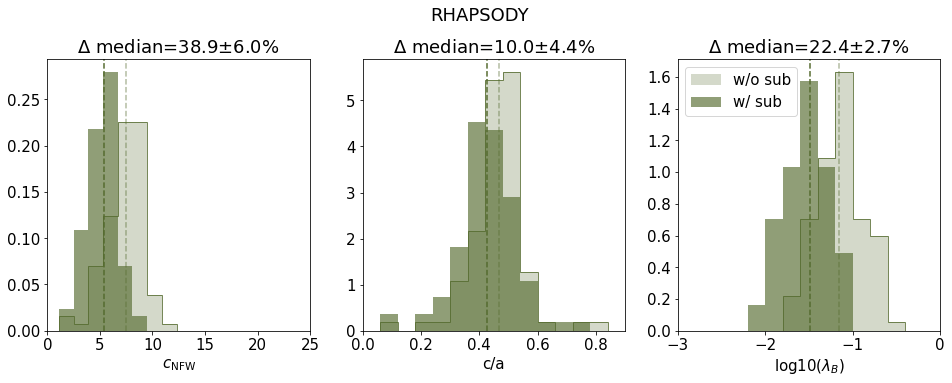

In [203]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
color='darkolivegreen'

n_samples = len(df_all_rhap_rm)
rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('RHAPSODY',y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
bins = np.arange(min(df_all_rhap_rm['calc_cs']),15.0,1.4)

ax1.hist(df_ns_rhap_rm_new_rvir['calc_cs'],alpha=0.25,bins = bins,label='Subs Excluded',density=True,color=color)
ax1.hist(df_ns_rhap_rm_new_rvir['calc_cs'],alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax1.hist(df_all_rhap_rm['calc_cs'],alpha=0.65,bins = bins,density=True,label='Subs Included',color=color)
#ax1.hist(df_all_rhap_rm['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#810f7c')
#ax1.hist(df_ns_rhap_rm_new_rvir['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#74a9cf')
ax1.axvline(np.median(df_all_rhap_rm['calc_cs']),linestyle = '--',color=color)
ax1.axvline(np.median(df_ns_rhap_rm_new_rvir['calc_cs']),linestyle = '--',color=color,alpha=0.45)
ax1.set_xlim(0,25)

print(mannwhitneyu(df_ns_rhap_rm_new_rvir['calc_cs'], df_all_rhap_rm['calc_cs']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_cs']),iqr((df_all_rhap_rm['calc_cs'])))
print("host med, iqr: ",np.median(df_ns_rhap_rm_new_rvir['calc_cs']),iqr((df_ns_rhap_rm_new_rvir['calc_cs'])))


diff = 100*(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm_new_rvir['calc_cs']))/np.median(df_all_rhap_rm['calc_cs'])
err1 = np.sqrt( np.std(df_all_rhap_rm['calc_cs'])**2 + np.std(df_ns_rhap_rm_new_rvir['calc_cs'])**2 )
err2 = diff*np.sqrt( (err1/(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm_new_rvir['calc_cs'])))**2+ (np.std(df_all_rhap_rm['calc_cs'])/np.median(df_all_rhap_rm['calc_cs']))**2 )
diff = -100*(np.median((df_all_rhap_rm['calc_cs']))-np.median((df_ns_rhap_rm_new_rvir['calc_cs'])))/np.median((df_all_rhap_rm['calc_cs']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm_new_rvir['calc_cs'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))

ax1.set_title(textstr)#,fontsize=15)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)

bins = np.arange(0.0,0.9,0.06)
ax2.hist(df_ns_rhap_rm_new_rvir['calc_shape'],alpha=0.25,bins=bins,density=True,label='w/o sub',color=color)
ax2.hist(df_ns_rhap_rm_new_rvir['calc_shape'],alpha=0.8,bins=bins,density=True,label='w/o sub',color=color,histtype='step')
ax2.hist(df_all_rhap_rm['calc_shape'],alpha=0.65,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_all_rhap_rm['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax2.hist(df_ns_rhap_rm_new_rvir['calc_shape'],histtype='step',alpha=0.25,bins=bins,density=True,color='#74a9cf')
ax2.axvline(np.median(df_all_rhap_rm['calc_shape']),linestyle = '--',color=color)
ax2.axvline(np.median(df_ns_rhap_rm_new_rvir['calc_shape']),linestyle = '--',color=color,alpha=0.45)
diff = 100*(np.median(df_all_rhap_rm['calc_shape'])-np.median(df_ns_rhap_rm_new_rvir['calc_shape']))/np.median(df_all_rhap_rm['calc_shape'])
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_xlim(0.,0.9)

print(mannwhitneyu(df_ns_rhap_rm_new_rvir['calc_shape'], df_all_rhap_rm['calc_shape']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_shape']),iqr(df_all_rhap_rm['calc_shape']))
print("host med, iqr: ",np.median(df_ns_rhap_rm_new_rvir['calc_shape']),iqr(df_ns_rhap_rm_new_rvir['calc_shape']))

diff = -100*(np.median((df_all_rhap_rm['calc_shape']))-np.median((df_ns_rhap_rm_new_rvir['calc_shape'])))/np.median((df_all_rhap_rm['calc_shape']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm_new_rvir['calc_shape'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))

ax2.set_title(textstr)#,fontsize=15)

bins = np.arange(-3.0,0.0,0.2)
ax3.hist(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),alpha=0.25,bins=bins,label='w/o sub',density=True,color=color)
ax3.hist(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),alpha=.8,bins=bins,density=True,color=color,histtype='step')
ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),alpha=.65,bins=bins,density=True,label='w/ sub',color=color)

#ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax3.hist(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#74a9cf')
ax3.set_xlabel('log10($\lambda_{B}$)',fontsize=15)

cut = np.argsort(rhap_mass_scale)[0:n_samples]

print(mannwhitneyu(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']), np.log10(df_all_rhap_rm['calc_spin'])))
print("all med, iqr: ",np.median(np.log10(df_all_rhap_rm['calc_spin'])),iqr(np.log10(df_all_rhap_rm['calc_spin'])))
print("host med, iqr: ",np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])),iqr(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])))

ax3.axvline(np.median(np.log10(df_all_rhap_rm['calc_spin'])),linestyle = '--',color=color)
ax3.axvline(np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])),linestyle = '--',color=color,alpha=0.45)
#diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))

diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
ax3.set_xlim(-3,0.0)
ax3.set_title(textstr)
ax3.legend()
plt.savefig('rhap_host_ws_wos_rm_compare_new_radii.png',bbox_inches='tight')

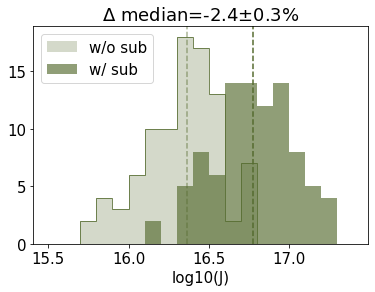

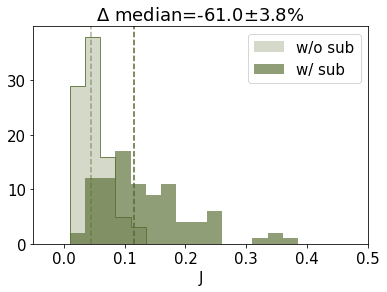

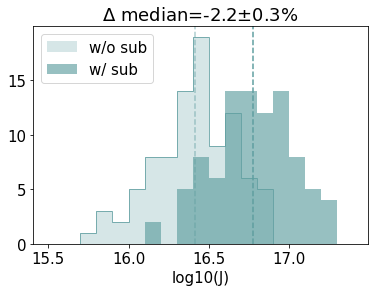

MannwhitneyuResult(statistic=1313.0, pvalue=6.511084395967572e-16)
all med, iqr:  0.11547380138669319 0.092557676868256
host med, iqr:  0.05008910576315554 0.04208824940761619


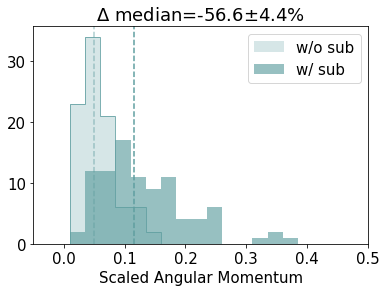

In [261]:
G = 4.302*(10**-9.) # in Mpc Msun^-1 (km/s)^2 
h = 0.7
threshold_density = 94*2.7754e11*h**2 #94 x critical density ##M_sun/Mpc**3##


color='darkolivegreen'
spin_unscale_all = df_all_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
spin_unscale_host = df_ns_rhap_rm_new_rvir['calc_spin']*(np.sqrt(2.*G*recalc_mvir**3.*recalc_rvir))

bins = np.arange(15.5,17.5,0.10)
plt.figsize=(5,5)
plt.hist(np.log10(spin_unscale_host),bins=bins,label='w/o sub',color=color,alpha=0.25)
plt.hist(np.log10(spin_unscale_host),bins=bins,histtype='step',color=color,alpha=0.8)
plt.hist(np.log10(spin_unscale_all),bins=bins,label='w/ sub',color=color,alpha=0.65)
plt.xlabel('log10(J)')
plt.legend()
diff = -100*(np.median(np.log10(spin_unscale_all))-np.median(np.log10(spin_unscale_host)))/np.median(np.log10(spin_unscale_all))
err_margin = 100*get_med_shift_err(np.log10(spin_unscale_all),np.log10(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median(np.log10(spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median(np.log10(spin_unscale_all)),linestyle = '--',color=color)
plt.show()

fixed_r = 1.7 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
fixed_scale = (np.sqrt(2.*G*fixed_m**3.*fixed_r))
spin_unscale_all = df_all_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
spin_unscale_host = df_ns_rhap_rm_new_rvir['calc_spin']*(np.sqrt(2.*G*recalc_mvir**3.*recalc_rvir))


spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale

plt.figsize=(5,5)

bins = np.arange(0.01,.5,0.025)
plt.hist(spin_unscale_host,bins=bins,label='w/o sub',color=color,alpha=0.25)
plt.hist(spin_unscale_host,bins=bins,histtype='step',color=color,alpha=0.8)
plt.hist(spin_unscale_all,bins=bins,label='w/ sub',color=color,alpha=0.65)

plt.xlabel('J')
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median((spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median((spin_unscale_all)),linestyle = '--',color=color)
plt.xlim(-.05,.5)
plt.savefig('rhap_ang_mom_ws_wos_compare_modified_rvir.png',bbox_inches = 'tight')
plt.show()

##### OG HOST RVIR #######

color='cadetblue'
spin_unscale_host = df_ns_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
spin_unscale_all = df_all_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))

plt.figsize=(5,5)

bins = np.arange(15.5,17.5,0.10)
plt.hist(np.log10(spin_unscale_host),label='w/o sub',color=color,alpha=0.25,bins=bins)
plt.hist(np.log10(spin_unscale_host),histtype='step',color=color,alpha=0.8,bins=bins)
plt.hist(np.log10(spin_unscale_all),label='w/ sub',color=color,alpha=0.65,bins=bins)

plt.xlabel('log10(J)')
plt.legend()
diff = -100*(np.median(np.log10(spin_unscale_all))-np.median(np.log10(spin_unscale_host)))/np.median(np.log10(spin_unscale_all))
err_margin = 100*get_med_shift_err(np.log10(spin_unscale_all),np.log10(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median(np.log10(spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median(np.log10(spin_unscale_all)),linestyle = '--',color=color)
plt.show()


fixed_r = 1.7 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
fixed_scale = np.sqrt(2.*G*fixed_m**3.*fixed_r)

spin_unscale_host = df_ns_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
spin_unscale_all = df_all_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale
print(mannwhitneyu(spin_unscale_host, spin_unscale_all))

plt.figsize=(5,5)
bins = np.arange(0.01,.5,0.025)
plt.hist(spin_unscale_host,label='w/o sub',color=color,alpha=0.25,bins=bins)
plt.hist(spin_unscale_host,histtype='step',color=color,alpha=0.8,bins=bins)
plt.hist(spin_unscale_all,label='w/ sub',color=color,bins=bins,alpha=0.65)
plt.xlabel('Scaled Angular Momentum')
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median((spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median((spin_unscale_all)),linestyle = '--',color=color)
print("all med, iqr: ",np.median(spin_unscale_all),iqr(spin_unscale_all))
print("host med, iqr: ",np.median(spin_unscale_host),iqr(spin_unscale_host))

plt.xlim(-.05,.5)
plt.savefig('rhap_ang_mom_ws_wos_compare.png',bbox_inches = 'tight')
plt.show()

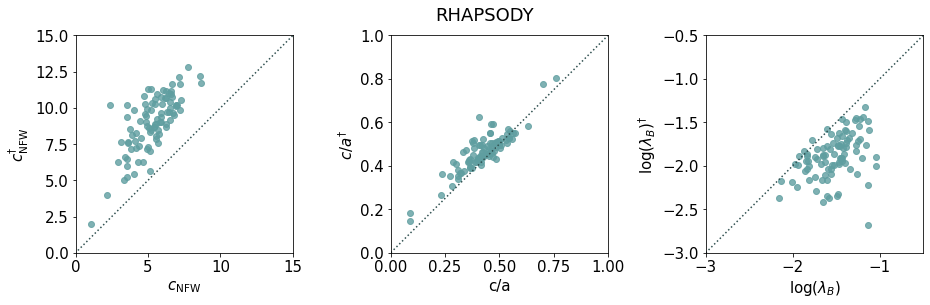

In [136]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,4))
fig.suptitle('RHAPSODY')#,y=1.025)
plt.rcParams['axes.facecolor'] = '1.'

color = 'cadetblue'
line_color = 'darkslategray'

ax1.scatter(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm['calc_cs'],alpha=0.8,marker='o',color=color)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)
ax1.set_ylabel('$c_\mathrm{NFW}^{\dag}$',fontsize=15)
ax1.plot([-1,15],[-1,15],color=line_color,ls=':')
ax1.set_xlim(0,15)
ax1.set_ylim(0,15)
ax1.set_aspect('equal')

ax2.scatter(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm['calc_shape'],alpha=0.8,marker='o',color=color)
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_ylabel('$c/a^{\dag}$',fontsize=15)
ax2.plot([-1,1],[-1,1],color=line_color,ls=':')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_aspect('equal')

ax3.plot([-3,-0],[-3,0],color=line_color,ls=':')
ax3.scatter(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm['calc_spin']),alpha=0.8,marker='o',color=color)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
ax3.set_ylabel('log($\lambda_{B})^{\dag}$',fontsize=15)
ax3.set_xlim(-3.,-0.5)
ax3.set_ylim(-3.,-0.5)
ax3.set_aspect('equal')

plt.savefig('rhap_host_ws_wos_compare_scatter.png',bbox_inches='tight')

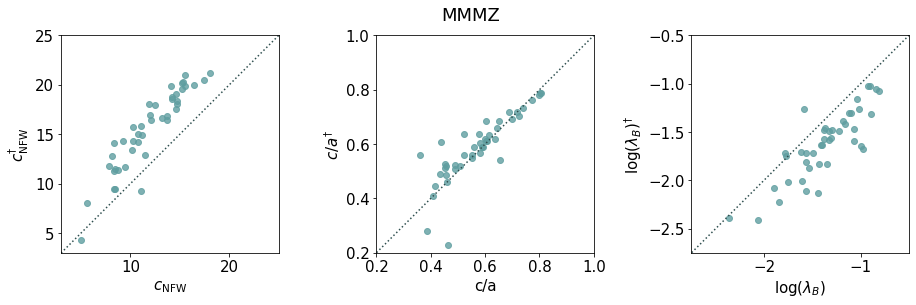

In [137]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,4))
fig.suptitle('MMMZ')#,y=1.025)
plt.rcParams['axes.facecolor'] = '1.'

color = 'cadetblue'
line_color = 'darkslategray'

ax1.scatter(df_all['calc_cs'],df_ns['calc_cs'],alpha=0.8,marker='o',color=color)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)
ax1.set_ylabel('$c_\mathrm{NFW}^{\dag}$',fontsize=15)
ax1.plot([-1,25],[-1,25],color=line_color,ls=':')
ax1.set_xlim(3,25)
ax1.set_ylim(3,25)
ax1.set_aspect('equal')

ax2.scatter(df_all['calc_shape'],df_ns['calc_shape'],alpha=0.8,marker='o',color=color)
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_ylabel('$c/a^{\dag}$',fontsize=15)
ax2.plot([-1,1],[-1,1],color=line_color,ls=':')
ax2.set_xlim(0.2,1)
ax2.set_ylim(0.2,1)
ax2.set_aspect('equal')

ax3.plot([-5,0],[-5,0],color=line_color,ls=':')
ax3.scatter(np.log10(df_all['calc_spin']),np.log10(df_ns['calc_spin']),alpha=0.8,marker='o',color=color)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
ax3.set_ylabel('log($\lambda_{B})^{\dag}$',fontsize=15)
ax3.set_xlim(-2.75,-0.5)
ax3.set_ylim(-2.75,-0.5)
ax3.set_aspect('equal')

plt.savefig('mwm_host_ws_wos_compare_scatter.png',bbox_inches='tight')

In [25]:

def scatter_hist(x, y, ax, ax_histx, label1,label2,bin_w = .25,legend_loc = 1,ax_histy=None):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    #ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,color='orange',alpha=0.8)
    ax.axis('equal')
    # now determine nice limits by hand:
    binwidth = bin_w
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,color='m',alpha=0.5)
    ax_histx.hist(y, bins=bins,color='b',alpha=0.3)
    ax_histx.axvline(np.median(x),color='m',linestyle='-',label= label1,alpha=0.8)
    ax_histx.axvline(np.median(y),color='b',linestyle='-',label=label2,alpha=0.8)
    #ax_histy.hist(y, bins=bins, orientation='horizontal',color='m',alpha=0.5)
    ax_histx.legend(loc=legend_loc)
    #ax_histy.axhline(np.median(y),color='b',linestyle='--')
    #ax_histy.axhline(np.median(x),color='b')

In [198]:
diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm['calc_spin']),96)
print('$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1)))

diff = -100*(np.median((df_all_rhap_rm['calc_cs']))-np.median((df_ns_rhap_rm['calc_cs'])))/np.median((df_all_rhap_rm['calc_cs']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm['calc_cs'],96)
print('$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1)))

diff = -100*(np.median((df_all_rhap_rm['calc_shape']))-np.median((df_ns_rhap_rm['calc_shape'])))/np.median((df_all_rhap_rm['calc_shape']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm['calc_shape'],96)
print('$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1)))

$\Delta$ median=-26.5$\pm$3.6$\%$
$\Delta$ median=70.3$\pm$7.4$\%$
$\Delta$ median=9.7$\pm$3.9$\%$


In [68]:
def rlm(y,x,print_res=False):
    x = sm.add_constant(x) 
    huber_t = sm.RLM(y,x,M=sm.robust.norms.HuberT())
    hub_results = huber_t.fit()
    #print(hub_results.params)
    #print(hub_results.bse)
    #print(
    #hub_results.summary(
    #    yname="y", xname=["var_%d" % i for i in range(len(hub_results.params))]
    #))
    #print(hub_results.summary())
#)
    if print_res:
        #print(hub_results.params)
        #print(hub_results.bse)
        print(hub_results.summary())
    return hub_results

In [69]:
def boot(mass_frac, prop, bin_cens, n_bins = 9, n_samples = 250):

    step = int(np.floor(len(mass_frac)/n_bins))
    srtd = np.argsort(mass_frac)
    bin_meds = np.zeros((n_samples,n_bins))
    bin_stds = np.zeros((n_samples,n_bins))
    coefs = np.zeros(n_samples)
    intercepts = np.zeros(n_samples)

    for k in range(n_samples):
        j = 0
        for i in range(n_bins):
            if j > len(mass_frac):
                print("true")
                j=max(len(mass_frac))

            sample = np.random.choice(prop[srtd][j:j+step],len(prop[srtd][j:j+step]))
            bin_meds[k][i] += np.median(sample)
            bin_stds[k][i] += np.std(sample)
        
            j+=step
    
        huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds[k], sample_weight=1/bin_stds[k])
        coefs[k] += huber.coef_
        intercepts[k] += huber.intercept_

    return np.std(coefs),np.std(intercepts)


def boot2(mass_frac, prop, n=45, n_samples = 250):

    coefs = np.zeros(n_samples)
    intercepts = np.zeros(n_samples)

    for k in range(n_samples):
        j = 0
        sample = np.random.choice(prop,n)
        huber = HuberRegressor().fit(mass_frac.reshape(-1, 1), sample)#, sample_weight=1/bin_stds[k])
        coefs[k] += huber.coef_
        intercepts[k] += huber.intercept_

    return np.std(coefs),np.std(intercepts)
       
       

score:  0.7144475087320661
[0.91983669] -0.0042268061950305495
(0.2775650174134982, 0.025288898355583806)


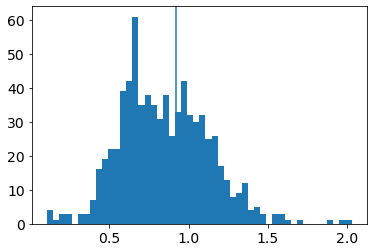

(0.26159487714761265, 0.023611787976484777)


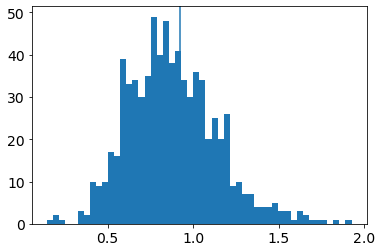

(0.26668426232670067, 0.02414704573113435)


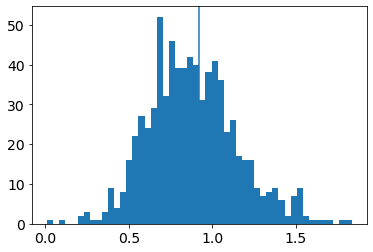

In [1181]:
bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_rhap,d_shape,n_bins=9)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)


print(boot(mass_frac_rhap, d_shape, bin_cens, n_bins = 9, n_samples = 750))
plt.axvline(huber.coef_)
plt.show()
print(boot(mass_frac_rhap, d_shape, bin_cens, n_bins = 9, n_samples = 750))
plt.axvline(huber.coef_)
plt.show()
print(boot(mass_frac_rhap, d_shape, bin_cens, n_bins = 9, n_samples = 750))
plt.axvline(huber.coef_)
plt.show()

In [70]:
def get_equal_bins(mass_frac,prop,n_bins = 9):

    step = int(np.floor(len(mass_frac)/n_bins))
    srtd = np.argsort(mass_frac)
    bin_meds = np.zeros(n_bins)
    bin_edges = np.zeros(n_bins+1)
    bin_stds = np.zeros(n_bins)
    j = 0

    for i in range(n_bins):
        if j > len(mass_frac):
            print("true")
            j=max(len(mass_frac))
            
        bin_stds[i] += np.std(prop[srtd][j:j+step])
        bin_meds[i]+= np.median(prop[srtd][j:j+step])
        bin_edges[i] += np.sort(mass_frac)[j]
        
        j+=step
    
    bin_edges[i+1] += max(np.sort(mass_frac))
    bin_cens = (bin_edges[:-1]+bin_edges[1:])/2.

    return bin_meds,bin_cens,bin_stds


FRACTIONAL CHANGE(SUBHALO MASS FRACTION)
CONCENTRATION
(0.5916372207925917, 5.287458517599978e-10)
SpearmanrResult(correlation=0.502088374458641, pvalue=3.4114411434112393e-07)
score:  0.7114805799442481
[2.39588777] 0.28880886738763617
##### NO BINS ######
score:  0.3331905820604931
[2.74188737] 0.2602316830468354


(0.4837735766621711, 0.08879173930102213)
(0.47442028015623317, 0.09218309944472673)
(0.4748391751752639, 0.09339002713008938)


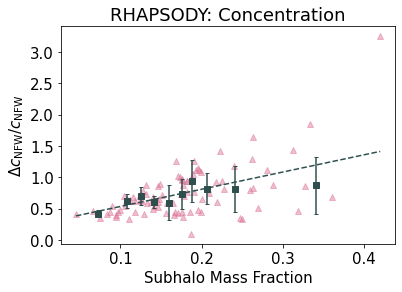

SHAPE
(0.48403201522488554, 1.0172659306551887e-06)
SpearmanrResult(correlation=0.47061634018155757, pvalue=2.2020112411732295e-06)
score:  0.6385844368791241
[0.74514162] -0.036899489989765895
###### NO BINS ######
score:  0.21232370280933854
[0.98652852] -0.0706147996299626
(0.19715676950371144, 0.037508857101940025)
(0.17531293275254878, 0.03365169139706303)
(0.18400681700079208, 0.036656254944227896)


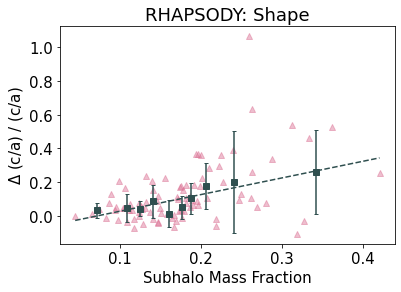

SPIN
SpearmanrResult(correlation=0.41564046052124587, pvalue=3.785442436502016e-05)
score:  0.4749917040086068
m,b: [0.89463675],0.06128453766050209
##### NO BINS #####
score:  0.23101395469713681
[1.13821319] 0.02913047058367682
(0.26683519457923155, 0.04743023804424939)
(0.30239094234173075, 0.05695923818154029)
(0.2788537805367259, 0.05317533395762854)


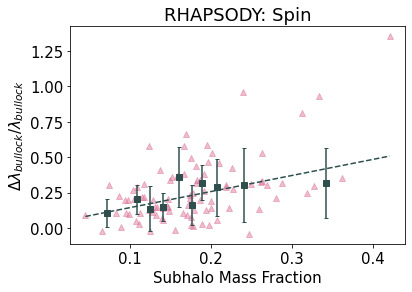

'\n###############################\n##selecting only early forming halos\nsrtd = np.argsort(rhap_50_mass_scale)\nbin_meds, bin_cens, bin_stds = get_equal_bins(np.array(mass_frac_rhap[srtd][0:46]),\n        np.array(d_spin[srtd][0:46]),n_bins=7)\nhuber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)\nprint(\'score: \',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))\nprint("m,b: {},{}".format(huber.coef_,huber.intercept_))\n\nprint(boot(np.array(mass_frac_rhap[srtd][0:46]), np.array(d_spin[srtd][0:46]), bin_cens, n_bins = 7, n_samples = 750))\nprint(boot(np.array(mass_frac_rhap[srtd][0:46]), np.array(d_spin[srtd][0:46]), bin_cens, n_bins = 7, n_samples = 750))\nprint(boot(np.array(mass_frac_rhap[srtd][0:46]), np.array(d_spin[srtd][0:46]), bin_cens, n_bins = 7, n_samples = 750))\n\nprint(\'no bins\')\nsrtd = np.argsort(rhap_50_mass_scale)\nhuber = HuberRegressor().fit(np.array(mass_frac_rhap[srtd][0:47]).reshape(-1, 1), np.arra

In [199]:
print("FRACTIONAL CHANGE(SUBHALO MASS FRACTION)")

srtd = np.argsort(mass_frac_rhap)
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])
n_samples = len(d_shape)
n_bins=10

print('CONCENTRATION')


plt.scatter(np.array(mass_frac_rhap),np.array(d_c)
        ,c='palevioletred',alpha=0.45,marker='^')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_rhap,d_c,n_bins=n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)

print(pearsonr(d_c,mass_frac_rhap))
print(spearmanr(d_c,mass_frac_rhap))

print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)
#print(boot(mass_frac_rhap, d_c, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_rhap, d_c, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_rhap, d_c, bin_cens, n_bins = n_bins, n_samples = 750))


#############
print('##### NO BINS ######')
huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), d_c)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_rhap).reshape(-1, 1), d_c))#, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

print(boot2(np.array(mass_frac_rhap), d_c, n=len(d_c), n_samples = 250))
print(boot2(np.array(mass_frac_rhap), d_c, n=len(d_c), n_samples = 250))
print(boot2(np.array(mass_frac_rhap), d_c, n=len(d_c), n_samples = 250))

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),color='darkslategray',ls='--')

#huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), d_c)
#plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
#        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),'palevioletred',linestyle='--')


plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
#plt.ylim(.2,2.35)
plt.title('RHAPSODY: Concentration')
plt.savefig('rhap_c_vs_mass_frac.png',bbox_inches='tight' )
plt.show()


print('SHAPE')

print(pearsonr(np.array(d_shape),np.array(mass_frac_rhap)))
print(spearmanr(np.array(d_shape),np.array(mass_frac_rhap)))

plt.scatter(np.array(mass_frac_rhap),np.array(d_shape),
        c='palevioletred',alpha=0.45,marker='^',label='early')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_rhap,d_shape,n_bins=n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

#print(boot(mass_frac_rhap, d_shape, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_rhap, d_shape, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_rhap, d_shape, bin_cens, n_bins = n_bins, n_samples = 750))

print('###### NO BINS ######')
huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), d_shape)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_rhap).reshape(-1, 1), d_shape))#, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

print(boot2(np.array(mass_frac_rhap), d_shape, n=len(d_c), n_samples = 250))
print(boot2(np.array(mass_frac_rhap), d_shape, n=len(d_c), n_samples = 250))
print(boot2(np.array(mass_frac_rhap), d_shape, n=len(d_c), n_samples = 250))


plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,color='darkslategray',marker='s',
        ls='none',capsize=2,label='binned statistic of data')

plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),color='darkslategray',ls='--')

#huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), d_shape)
#plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
#        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),'palevioletred',linestyle='--')


plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$ (c/a) / (c/a)')
#plt.ylim(-.2,.9)
plt.title('RHAPSODY: Shape')
plt.savefig('rhap_shape_vs_mass_frac.png',bbox_inches='tight')
plt.show()



########################
print('SPIN')

print(spearmanr(d_spin,mass_frac_rhap))

plt.scatter(np.array(mass_frac_rhap),np.array(d_spin),
       c='palevioletred',alpha=0.45,marker='^',label='early')


bin_meds, bin_cens, bin_stds = get_equal_bins(np.array(mass_frac_rhap),
        np.array(d_spin),n_bins=n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("m,b: {},{}".format(huber.coef_,huber.intercept_))

#print(boot(np.array(mass_frac_rhap), np.array(d_spin), bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(np.array(mass_frac_rhap), np.array(d_spin), bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(np.array(mass_frac_rhap), np.array(d_spin), bin_cens, n_bins = n_bins, n_samples = 750))

print('##### NO BINS #####')
huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), np.array(d_spin))#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_rhap).reshape(-1, 1), np.array(d_spin)))#, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)


print(boot2(np.array(mass_frac_rhap), np.array(d_spin), n=len(np.array(d_spin)), n_samples = 250))
print(boot2(np.array(mass_frac_rhap), np.array(d_spin), n=len(np.array(d_spin)), n_samples = 250))
print(boot2(np.array(mass_frac_rhap), np.array(d_spin), n=len(np.array(d_spin)), n_samples = 250))


plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,color='darkslategray',marker='s',capsize=2,
    ls = 'none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),
        color='darkslategray',ls='--')

plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
#plt.set_ylim(-.45,1.05)
plt.title('RHAPSODY: Spin')
plt.savefig('rhap_spin_vs_mass_frac.png',bbox_inches='tight')

plt.show()



"""
###############################
##selecting only early forming halos
srtd = np.argsort(rhap_50_mass_scale)
bin_meds, bin_cens, bin_stds = get_equal_bins(np.array(mass_frac_rhap[srtd][0:46]),
        np.array(d_spin[srtd][0:46]),n_bins=7)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("m,b: {},{}".format(huber.coef_,huber.intercept_))

print(boot(np.array(mass_frac_rhap[srtd][0:46]), np.array(d_spin[srtd][0:46]), bin_cens, n_bins = 7, n_samples = 750))
print(boot(np.array(mass_frac_rhap[srtd][0:46]), np.array(d_spin[srtd][0:46]), bin_cens, n_bins = 7, n_samples = 750))
print(boot(np.array(mass_frac_rhap[srtd][0:46]), np.array(d_spin[srtd][0:46]), bin_cens, n_bins = 7, n_samples = 750))

print('no bins')
srtd = np.argsort(rhap_50_mass_scale)
huber = HuberRegressor().fit(np.array(mass_frac_rhap[srtd][0:47]).reshape(-1, 1), np.array(d_spin[srtd][0:47]))#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_rhap[srtd][0:47]).reshape(-1, 1), np.array(d_spin[srtd][0:47])))#, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

#print(boot2(np.array(mass_frac_rhap[srtd][0:47]), np.array(d_spin[srtd][0:47]), n=len(np.array(d_spin[srtd][0:47])), n_samples = 250))
#print(boot2(np.array(mass_frac_rhap[srtd][0:47]), np.array(d_spin[srtd][0:47]), n=len(np.array(d_spin[srtd][0:47])), n_samples = 250))
#print(boot2(np.array(mass_frac_rhap[srtd][0:47]), np.array(d_spin[srtd][0:47]), n=len(np.array(d_spin[srtd][0:47])), n_samples = 250))


plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,color='slategray',marker='s',capsize=2,
    ls = 'none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),
        color='slategray',ls='--')

#huber = HuberRegressor().fit(np.array(mass_frac_rhap[srtd][0:46]).reshape(-1, 1), d_spin[srtd][0:46])
#plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
#        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),'palevioletred',linestyle='--')


plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
#plt.set_ylim(-.45,1.05)
plt.title('RHAPSODY: Spin')
#plt.savefig('rhap_spin_vs_mass_frac.png',bbox_inches='tight')
plt.show()
"""

FRACTIONAL CHANGE(SUBHALO MASS FRACTION)
SHAPE
SpearmanrResult(correlation=0.43038356991845356, pvalue=0.0039671697039437145)
score:  0.9224277280604626
[1.03581723] -0.03135055130914853
no bins
score:  -0.05641081608817311
[0.63592289] -0.005585736878390588
(0.18570409289383183, 0.015176642535317647)
(0.17726961911427352, 0.01759950741423821)
(0.1489543295178158, 0.01491410584657026)


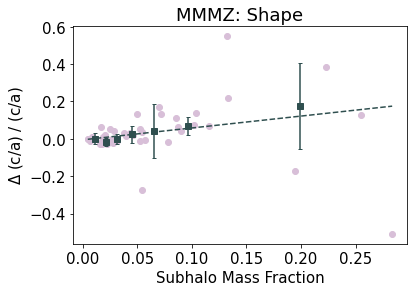

Concentration
score:  0.4896054847674042
[2.23235079] 0.2119759046937853
no bins
score:  -0.07304928267759081
[0.92533088] 0.26995719708912763
(0.3349657100290731, 0.029235103292850766)
(0.3252733301801319, 0.028407192509728525)
(0.336713265279403, 0.03247416630978201)
SpearmanrResult(correlation=0.42962851102385985, pvalue=0.0040383282449759925)


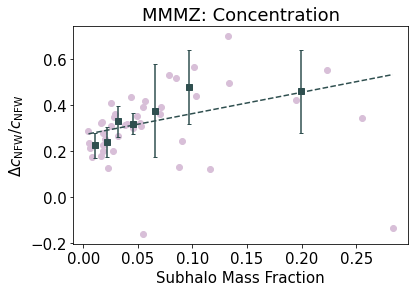

SPIN
score:  0.6513849361753419
[0.92446738] 0.1144543550325211
no bins
score:  0.042890791013161955
[1.08177857] 0.12030115789838562
(0.3208422139945402, 0.029128007369570445)
(0.33499555112193735, 0.029713239561056287)
(0.3447721085320145, 0.029161859499070325)
SpearmanrResult(correlation=0.49260042283298094, pvalue=0.0007917366937589408)


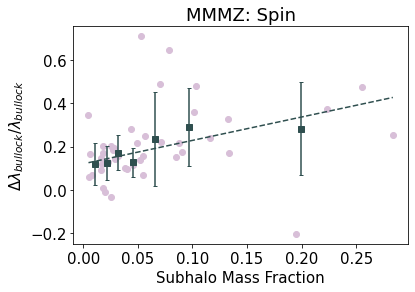

In [200]:
print("FRACTIONAL CHANGE(SUBHALO MASS FRACTION)")

n_bins = 7
d_shape = (df_ns['calc_shape']-df_all['calc_shape'])/df_all['calc_shape']
d_c = (df_ns['calc_cs']-df_all['calc_cs'])/df_all['calc_cs']
d_spin = (np.log10(df_ns['calc_spin'])-np.log10(df_all['calc_spin']))/np.log10(df_all['calc_spin'])
n_samples = len(d_spin)

print('SHAPE')

print(spearmanr(np.array(d_shape),np.array(mass_frac_mmmz)))

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_mmmz,d_shape,n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

print('no bins')
huber = HuberRegressor().fit(np.array(mass_frac_mmmz).reshape(-1, 1), d_shape)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_mmmz).reshape(-1, 1), d_shape))#, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

print(boot2(np.array(mass_frac_mmmz), d_shape, n=len(d_shape), n_samples = 250))
print(boot2(np.array(mass_frac_mmmz), d_shape, n=len(d_shape), n_samples = 250))
print(boot2(np.array(mass_frac_mmmz), d_shape, n=len(d_shape), n_samples = 250))


#print(boot(mass_frac_mmmz, d_shape, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_mmmz, d_shape, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_mmmz, d_shape, bin_cens, n_bins = n_bins, n_samples = 750))


plt.scatter(np.array(mass_frac_mmmz),np.array(d_shape)
        ,color='thistle',alpha=1)

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_mmmz).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_mmmz).reshape(-1, 1)),color='darkslategray',ls='--')

plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$ (c/a) / (c/a)')
plt.title('MMMZ: Shape')
#plt.savefig('mmmz_shape_vs_mass_frac.png',bbox_inches='tight' )
plt.show()


print('Concentration')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_mmmz,d_c,n_bins)

huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

#print(boot(mass_frac_mmmz, d_c, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_mmmz, d_c, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_mmmz, d_c, bin_cens, n_bins = n_bins, n_samples = 750))

print('no bins')
huber = HuberRegressor().fit(np.array(mass_frac_mmmz).reshape(-1, 1), d_c)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_mmmz).reshape(-1, 1), d_c))#, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

print(boot2(np.array(mass_frac_mmmz), d_c, n=len(d_shape), n_samples = 250))
print(boot2(np.array(mass_frac_mmmz), d_c, n=len(d_shape), n_samples = 250))
print(boot2(np.array(mass_frac_mmmz), d_c, n=len(d_shape), n_samples = 250))


print(spearmanr(np.array(d_c),np.array(mass_frac_mmmz)))
plt.scatter(np.array(mass_frac_mmmz),np.array(d_c),
        color='thistle',alpha=1)

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_mmmz).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_mmmz).reshape(-1, 1)),color='darkslategray',ls='--')


plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
#row1[0].set_ylim(-0.05,.8)
plt.title('MMMZ: Concentration')
#plt.savefig('mmmz_c_vs_mass_frac.png',bbox_inches='tight' )
plt.show()


print('SPIN')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_mmmz,d_spin,n_bins)

huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

#print(boot(mass_frac_mmmz, d_spin, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_mmmz, d_spin, bin_cens, n_bins = n_bins, n_samples = 750))
#print(boot(mass_frac_mmmz, d_spin, bin_cens, n_bins = n_bins, n_samples = 750))

print('no bins')
huber = HuberRegressor().fit(np.array(mass_frac_mmmz).reshape(-1, 1), d_spin)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_mmmz).reshape(-1, 1), d_spin))#, sample_weight=1/bin_stds))
print(huber.coef_,huber.intercept_)

print(boot2(np.array(mass_frac_mmmz), d_spin, n=len(d_shape), n_samples = 250))
print(boot2(np.array(mass_frac_mmmz), d_spin, n=len(d_shape), n_samples = 250))
print(boot2(np.array(mass_frac_mmmz), d_spin, n=len(d_shape), n_samples = 250))


print(spearmanr(np.array(d_spin),np.array(mass_frac_mmmz)))

cut2 =np.argsort(mwm_50_mass_scale)[0:n_samples]
plt.scatter(np.array(mass_frac_mmmz),np.array(d_spin),
        color='thistle',marker='o',alpha=1.)

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_mmmz).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_mmmz).reshape(-1, 1)),color='darkslategray',ls='--')


plt.xlabel('Subhalo Mass Fraction')
#plt.ylim()
plt.ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
plt.title("MMMZ: Spin")
#plt.savefig('mmmz_spin_vs_mass_frac.png',bbox_inches='tight' )
plt.show()

FRACTIONAL CHANGE mwm_90_mass_scale
mwm shape
(-0.07570451852364234, 0.6294558745601034)
SpearmanrResult(correlation=-0.004832376925400181, pvalue=0.9754653989601667)
mwm c
(0.08032471980952843, 0.6086285899204561)
SpearmanrResult(correlation=0.2758985200845666, pvalue=0.07332313651485928)
mwm spin
(0.22676090611860203, 0.1436646453102806)
SpearmanrResult(correlation=0.33690727876774385, pvalue=0.027162111224171972)


No handles with labels found to put in legend.



FRACTIONAL CHANGE (90 Mass Scale)
rhap shape
(0.15876134784467683, 0.13064346672390106)
SpearmanrResult(correlation=0.1671161937641601, pvalue=0.1113341753865757)
rhap c
(0.05034335174502099, 0.6336636180993683)
SpearmanrResult(correlation=-0.05312639674491007, pvalue=0.6149932858895683)
rhap spin
(0.169501413370246, 0.10624946112263414)
SpearmanrResult(correlation=0.1806790684771049, pvalue=0.08479214307774507)


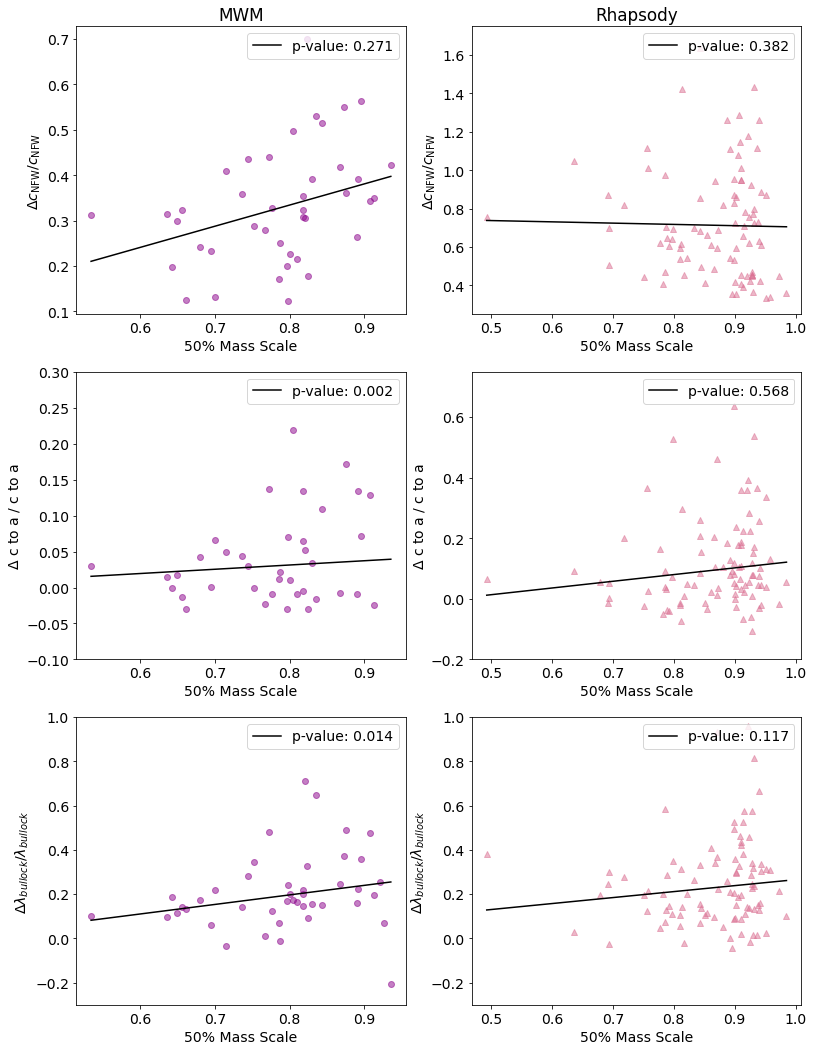

In [120]:
prop = mwm_90_mass_scale
prop_name = "mwm_90_mass_scale"
print("FRACTIONAL CHANGE {}".format(prop_name))
ns = df_ns
ws = df_all

cut = np.logical_and(prop<15.99,prop>.0)
srtd = np.argsort(np.array(prop)[cut])
d_shape = (ns['calc_shape']-ws['calc_shape'])/ws['calc_shape']
d_c = (ns['calc_cs']-ws['calc_cs'])/ws['calc_cs']
d_spin = (np.log10(ns['calc_spin'])-np.log10(ws['calc_spin']))/np.log10(ws['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<11.35,np.array(d_shape)[cut][srtd]>-11.1)


#smpls = boot(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('mwm shape')
print(pearsonr(np.array(d_shape),np.array(prop)))
print(spearmanr(np.array(d_shape),np.array(prop)))

shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(prop)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_shape],smpls)
#print("mwm HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),round(shape_b,3),round(shape_b_err,3)))


#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<11.99,np.array(d_c)[cut][srtd]>.0)

#smpls = boot(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('mwm c')
print(pearsonr(np.array(d_c),np.array(prop)))
print(spearmanr(np.array(d_c),np.array(prop)))

c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(prop)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_c],smpls)
#print("mwm HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<11.99,np.array(d_spin)[cut][srtd]>-11.5)

#smpls = boot(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)

print('mwm spin')
print(pearsonr(np.array(d_spin),np.array(prop)))
print(spearmanr(np.array(d_spin),np.array(prop)))

spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(prop)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(mwm_50_mass_scale)[cut][srtd][cut_spin],smpls)
#print("mwm HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),round(spin_b_err,3)))


re_srtd=np.argsort(prop)

widths = [6,6]
gs_kw = dict(width_ratios=widths)
fig, (row1,row2,row3)=plt.subplots(ncols=2, nrows=3,gridspec_kw=gs_kw,figsize=(13,18))
plt.rcParams['axes.facecolor'] = '1.'

row2[0].scatter(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='darkmagenta',alpha=0.5)
row2[0].plot(np.array(prop)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.002')#{}'.format(round(shape_hub.bse[0],3)))
row2[0].set_xlabel('50% Mass Scale')
row2[0].set_ylabel('$\Delta$ c to a / c to a')
row2[0].set_ylim(-.1,.3)
row2[0].legend(loc=1)

row1[0].scatter(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='darkmagenta',alpha=0.5)
row1[0].plot(np.array(prop)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),
        #round(c_b,3),round(c_b_err,3)))
        label='p-value: 0.271')#{}'.format(round(c_hub.bse[0],3)))
row1[0].set_xlabel('50% Mass Scale')
row1[0].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[0].set_title('MWM')
row1[0].legend(loc=1)

row3[0].scatter(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='darkmagenta',alpha=0.5)
#row1[2].plot(mass_frac_rhap[re_srtd],spin_line_y_ransac[re_srtd])
row3[0].plot(np.array(prop)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),
        #round(spin_b,3),round(spin_b_err,3)))
        label='p-value: 0.014')#{}'.format(round(spin_hub.bse[0],3)))
row3[0].set_xlabel('50% Mass Scale')
row3[0].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[0].legend(loc=1)
row3[0].set_ylim(-0.3,1.0)


plt.legend()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)
print('')
print("FRACTIONAL CHANGE (90 Mass Scale)")
rhap_mass_scale = rhap__mass_scale#np.load('rhap_TU_vals.npy')
#np.load('rhapsody_50mass_scale.npy')
cut = np.logical_and(rhap_mass_scale<15.99,rhap_mass_scale>0.0)
srtd = np.argsort(np.array(rhap_mass_scale)[cut])
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<11.85,np.array(d_shape)[cut][srtd]>-11.25)


#smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('rhap shape')
print(pearsonr(np.array(d_shape),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_shape),np.array(rhap_mass_scale)))


shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(rhap_mass_scale)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_shape],smpls)
#print("rhap HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),2*round(shape_m_err,3),round(shape_b,3),2*round(shape_b_err,3)))



#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<11.6,np.array(d_c)[cut][srtd]>-0.25)

#smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('rhap c')
print(pearsonr(np.array(d_c),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_c),np.array(rhap_mass_scale)))


c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(rhap_mass_scale)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_c],smpls)
#print("rhap HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),2*round(c_m_err,3),round(c_b,3),2*round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<11.85,np.array(d_spin)[cut][srtd]>-12.1)

#smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)


print('rhap spin')
print(pearsonr(np.array(d_spin),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_spin),np.array(rhap_mass_scale)))


spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(rhap_mass_scale)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_spin],smpls)
#print("Rhap HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),2*round(spin_m_err,3),round(spin_b,3),2*round(spin_b_err,3)))


re_srtd=np.argsort(rhap_mass_scale)

#ax1 = fig.add_subplot(spec[0, 0])
row2[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='palevioletred',marker='^',alpha=0.5)
row2[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.568')#{}'.format(round(shape_hub.bse[0],3)))
row2[1].set_xlabel('50% Mass Scale')
row2[1].set_ylabel('$\Delta$ c to a / c to a')
row2[1].set_ylim(-.2,.75)
row2[1].legend(loc=1)

#ax2 = fig.add_subplot(spec[0, 1])
row1[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='palevioletred',marker='^',alpha=0.5)
row1[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),
        #round(c_b_err,3)))
        label='p-value: 0.382')#{}'.format(round(c_hub.bse[0],3)))
row1[1].set_xlabel('50% Mass Scale')
row1[1].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[1].set_ylim(.25,1.75)
row1[1].set_title('Rhapsody')
row1[1].legend(loc=1)

row3[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='palevioletred',marker='^',alpha=0.5)
row3[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),
        #round(spin_b_err,3)))
        label='p-value: 0.117')#{}'.format(round(spin_hub.bse[0],3)))
row3[1].set_xlabel('50% Mass Scale')
row3[1].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[1].set_ylim(-.3,1.0)
row3[1].legend(loc=1)


#plt.savefig('fractional_change_v_50_mass_scale.png',bbox_inches='tight')
plt.show()



In [109]:
print("FRACTIONAL CHANGE LMM")
prop = scale_last_MM#df_og_mmmz['sub_mass_far']/df_og_mmmz['sub_mass']
ns = df_ns
ws = df_all

cut = np.logical_and(prop<.99,prop>.0)
srtd = np.argsort(np.array(prop)[cut])
d_shape = (ns['calc_shape']-ws['calc_shape'])/ws['calc_shape']
d_c = (ns['calc_cs']-ws['calc_cs'])/ws['calc_cs']
d_spin = (np.log10(ns['calc_spin'])-np.log10(ws['calc_spin']))/np.log10(ws['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.35,np.array(d_shape)[cut][srtd]>-.1)


smpls = boot(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('mwm shape')
print(pearsonr(np.array(d_shape),np.array(prop)))
print(spearmanr(np.array(d_shape),np.array(prop)))

shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(prop)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_shape],smpls)
#print("mwm HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),round(shape_b,3),round(shape_b_err,3)))


#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<.99,np.array(d_c)[cut][srtd]>.0)

smpls = boot(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('mwm c')
print(pearsonr(np.array(d_c),np.array(prop)))
print(spearmanr(np.array(d_c),np.array(prop)))

c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(prop)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_c],smpls)
#print("mwm HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.99,np.array(d_spin)[cut][srtd]>-.5)

smpls = boot(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)

print('mwm spin')
print(pearsonr(np.array(d_spin),np.array(prop)))
print(spearmanr(np.array(d_spin),np.array(prop)))

spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(prop)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(mwm_50_mass_scale)[cut][srtd][cut_spin],smpls)
#print("mwm HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),round(spin_b_err,3)))


re_srtd=np.argsort(prop)

widths = [6,6]
gs_kw = dict(width_ratios=widths)
fig, (row1,row2,row3)=plt.subplots(ncols=2, nrows=3,gridspec_kw=gs_kw,figsize=(13,18))
plt.rcParams['axes.facecolor'] = '1.'

row2[0].scatter(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='darkmagenta',alpha=0.5)
row2[0].plot(np.array(prop)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.002')#{}'.format(round(shape_hub.bse[0],3)))
row2[0].set_xlabel('50% Mass Scale')
row2[0].set_ylabel('$\Delta$ c to a / c to a')
row2[0].set_ylim(-.1,.3)
row2[0].legend(loc=1)

row1[0].scatter(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='darkmagenta',alpha=0.5)
row1[0].plot(np.array(prop)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),
        #round(c_b,3),round(c_b_err,3)))
        label='p-value: 0.271')#{}'.format(round(c_hub.bse[0],3)))
row1[0].set_xlabel('50% Mass Scale')
row1[0].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[0].set_title('MWM')
row1[0].legend(loc=1)

row3[0].scatter(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='darkmagenta',alpha=0.5)
#row1[2].plot(mass_frac_rhap[re_srtd],spin_line_y_ransac[re_srtd])
row3[0].plot(np.array(prop)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),
        #round(spin_b,3),round(spin_b_err,3)))
        label='p-value: 0.014')#{}'.format(round(spin_hub.bse[0],3)))
row3[0].set_xlabel('50% Mass Scale')
row3[0].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[0].legend(loc=1)
row3[0].set_ylim(-0.3,1.0)


plt.legend()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)
print("FRACTIONAL CHANGE(Mass Scale)")
rhap_mass_scale = np.load('rhapsody_50mass_scale.npy')
cut = np.logical_and(rhap_mass_scale<.99,rhap_mass_scale>0.6)
srtd = np.argsort(np.array(rhap_mass_scale)[cut])
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.85,np.array(d_shape)[cut][srtd]>-.25)


smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('rhap shape')
print(pearsonr(np.array(d_shape),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_shape),np.array(rhap_mass_scale)))


shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(rhap_mass_scale)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_shape],smpls)
#print("rhap HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),2*round(shape_m_err,3),round(shape_b,3),2*round(shape_b_err,3)))



#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<1.6,np.array(d_c)[cut][srtd]>0.25)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('rhap c')
print(pearsonr(np.array(d_c),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_c),np.array(rhap_mass_scale)))


c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(rhap_mass_scale)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_c],smpls)
#print("rhap HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),2*round(c_m_err,3),round(c_b,3),2*round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.85,np.array(d_spin)[cut][srtd]>-12.1)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)


print('rhap spin')
print(pearsonr(np.array(d_spin),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_spin),np.array(rhap_mass_scale)))


spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(rhap_mass_scale)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_spin],smpls)
#print("Rhap HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),2*round(spin_m_err,3),round(spin_b,3),2*round(spin_b_err,3)))


re_srtd=np.argsort(rhap_mass_scale)


#ax1 = fig.add_subplot(spec[0, 0])
row2[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='palevioletred',marker='^',alpha=0.5)
row2[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.568')#{}'.format(round(shape_hub.bse[0],3)))
row2[1].set_xlabel('50% Mass Scale')
row2[1].set_ylabel('$\Delta$ c to a / c to a')
row2[1].set_ylim(-.2,.75)
row2[1].legend(loc=1)

#ax2 = fig.add_subplot(spec[0, 1])
row1[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='palevioletred',marker='^',alpha=0.5)
row1[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),
        #round(c_b_err,3)))
        label='p-value: 0.382')#{}'.format(round(c_hub.bse[0],3)))
row1[1].set_xlabel('50% Mass Scale')
row1[1].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[1].set_ylim(.25,1.75)
row1[1].set_title('Rhapsody')
row1[1].legend(loc=1)

row3[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='palevioletred',marker='^',alpha=0.5)
row3[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),
        #round(spin_b_err,3)))
        label='p-value: 0.117')#{}'.format(round(spin_hub.bse[0],3)))
row3[1].set_xlabel('50% Mass Scale')
row3[1].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[1].set_ylim(-.3,1.0)
row3[1].legend(loc=1)


#plt.savefig('fractional_change_v_50_mass_scale.png',bbox_inches='tight')
plt.show()



FRACTIONAL CHANGE LMM


NameError: name 'scale_last_MM' is not defined

In [110]:
print("FRACTIONAL CHANGE 25 mass scale")
prop = mwm_25_mass_scale#df_og_mmmz['sub_mass_far']/df_og_mmmz['sub_mass']
ns = df_ns
ws = df_all

cut = np.logical_and(prop<.99,prop>.0)
srtd = np.argsort(np.array(prop)[cut])
d_shape = (ns['calc_shape']-ws['calc_shape'])/ws['calc_shape']
d_c = (ns['calc_cs']-ws['calc_cs'])/ws['calc_cs']
d_spin = (np.log10(ns['calc_spin'])-np.log10(ws['calc_spin']))/np.log10(ws['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.35,np.array(d_shape)[cut][srtd]>-.1)


smpls = boot(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('mwm shape')
print(pearsonr(np.array(d_shape),np.array(prop)))
print(spearmanr(np.array(d_shape),np.array(prop)))

shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(prop)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_shape],smpls)
#print("mwm HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),round(shape_b,3),round(shape_b_err,3)))


#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<.99,np.array(d_c)[cut][srtd]>.0)

smpls = boot(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('mwm c')
print(pearsonr(np.array(d_c),np.array(prop)))
print(spearmanr(np.array(d_c),np.array(prop)))

c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(prop)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_c],smpls)
#print("mwm HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.99,np.array(d_spin)[cut][srtd]>-.5)

smpls = boot(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)

print('mwm spin')
print(pearsonr(np.array(d_spin),np.array(prop)))
print(spearmanr(np.array(d_spin),np.array(prop)))

spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(prop)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(mwm_50_mass_scale)[cut][srtd][cut_spin],smpls)
#print("mwm HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),round(spin_b_err,3)))


re_srtd=np.argsort(prop)

widths = [6,6]
gs_kw = dict(width_ratios=widths)
fig, (row1,row2,row3)=plt.subplots(ncols=2, nrows=3,gridspec_kw=gs_kw,figsize=(13,18))
plt.rcParams['axes.facecolor'] = '1.'

row2[0].scatter(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='darkmagenta',alpha=0.5)
row2[0].plot(np.array(prop)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.002')#{}'.format(round(shape_hub.bse[0],3)))
row2[0].set_xlabel('50% Mass Scale')
row2[0].set_ylabel('$\Delta$ c to a / c to a')
row2[0].set_ylim(-.1,.3)
row2[0].legend(loc=1)

row1[0].scatter(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='darkmagenta',alpha=0.5)
row1[0].plot(np.array(prop)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),
        #round(c_b,3),round(c_b_err,3)))
        label='p-value: 0.271')#{}'.format(round(c_hub.bse[0],3)))
row1[0].set_xlabel('50% Mass Scale')
row1[0].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[0].set_title('MWM')
row1[0].legend(loc=1)

row3[0].scatter(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='darkmagenta',alpha=0.5)
#row1[2].plot(mass_frac_rhap[re_srtd],spin_line_y_ransac[re_srtd])
row3[0].plot(np.array(prop)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),
        #round(spin_b,3),round(spin_b_err,3)))
        label='p-value: 0.014')#{}'.format(round(spin_hub.bse[0],3)))
row3[0].set_xlabel('50% Mass Scale')
row3[0].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[0].legend(loc=1)
row3[0].set_ylim(-0.3,1.0)


plt.legend()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)
print("FRACTIONAL CHANGE(Mass Scale)")
rhap_mass_scale = np.load('rhapsody_25mass_scale.npy')
cut = np.logical_and(rhap_mass_scale<.99,rhap_mass_scale>0.6)
srtd = np.argsort(np.array(rhap_mass_scale)[cut])
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.85,np.array(d_shape)[cut][srtd]>-.25)


smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('rhap shape')
print(pearsonr(np.array(d_shape),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_shape),np.array(rhap_mass_scale)))


shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(rhap_mass_scale)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_shape],smpls)
#print("rhap HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),2*round(shape_m_err,3),round(shape_b,3),2*round(shape_b_err,3)))



#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<1.6,np.array(d_c)[cut][srtd]>0.25)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('rhap c')
print(pearsonr(np.array(d_c),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_c),np.array(rhap_mass_scale)))


c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(rhap_mass_scale)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_c],smpls)
#print("rhap HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),2*round(c_m_err,3),round(c_b,3),2*round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.85,np.array(d_spin)[cut][srtd]>-12.1)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)


print('rhap spin')
print(pearsonr(np.array(d_spin),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_spin),np.array(rhap_mass_scale)))


spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(rhap_mass_scale)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_spin],smpls)
#print("Rhap HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),2*round(spin_m_err,3),round(spin_b,3),2*round(spin_b_err,3)))


re_srtd=np.argsort(rhap_mass_scale)


#ax1 = fig.add_subplot(spec[0, 0])
row2[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='palevioletred',marker='^',alpha=0.5)
row2[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.568')#{}'.format(round(shape_hub.bse[0],3)))
row2[1].set_xlabel('50% Mass Scale')
row2[1].set_ylabel('$\Delta$ c to a / c to a')
row2[1].set_ylim(-.2,.75)
row2[1].legend(loc=1)

#ax2 = fig.add_subplot(spec[0, 1])
row1[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='palevioletred',marker='^',alpha=0.5)
row1[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),
        #round(c_b_err,3)))
        label='p-value: 0.382')#{}'.format(round(c_hub.bse[0],3)))
row1[1].set_xlabel('50% Mass Scale')
row1[1].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[1].set_ylim(.25,1.75)
row1[1].set_title('Rhapsody')
row1[1].legend(loc=1)

row3[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='palevioletred',marker='^',alpha=0.5)
row3[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),
        #round(spin_b_err,3)))
        label='p-value: 0.117')#{}'.format(round(spin_hub.bse[0],3)))
row3[1].set_xlabel('50% Mass Scale')
row3[1].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[1].set_ylim(-.3,1.0)
row3[1].legend(loc=1)


#plt.savefig('fractional_change_v_50_mass_scale.png',bbox_inches='tight')
plt.show()



FRACTIONAL CHANGE 25 mass scale


AttributeError: 'int' object has no attribute 'reshape'

In [111]:
print("FRACTIONAL CHANGE 70 mass scale")
prop = mwm_70_mass_scale#df_og_mmmz['sub_mass_far']/df_og_mmmz['sub_mass']
ns = df_ns
ws = df_all

cut = np.logical_and(prop<.99,prop>.0)
srtd = np.argsort(np.array(prop)[cut])
d_shape = (ns['calc_shape']-ws['calc_shape'])/ws['calc_shape']
d_c = (ns['calc_cs']-ws['calc_cs'])/ws['calc_cs']
d_spin = (np.log10(ns['calc_spin'])-np.log10(ws['calc_spin']))/np.log10(ws['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.35,np.array(d_shape)[cut][srtd]>-.1)


smpls = boot(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('mwm shape')
print(pearsonr(np.array(d_shape),np.array(prop)))
print(spearmanr(np.array(d_shape),np.array(prop)))

shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(prop)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_shape],smpls)
#print("mwm HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),round(shape_b,3),round(shape_b_err,3)))


#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<.99,np.array(d_c)[cut][srtd]>.0)

smpls = boot(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('mwm c')
print(pearsonr(np.array(d_c),np.array(prop)))
print(spearmanr(np.array(d_c),np.array(prop)))

c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(prop)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_c],smpls)
#print("mwm HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.99,np.array(d_spin)[cut][srtd]>-.5)

smpls = boot(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)

print('mwm spin')
print(pearsonr(np.array(d_spin),np.array(prop)))
print(spearmanr(np.array(d_spin),np.array(prop)))

spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(prop)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(mwm_50_mass_scale)[cut][srtd][cut_spin],smpls)
#print("mwm HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),round(spin_b_err,3)))


re_srtd=np.argsort(prop)

widths = [6,6]
gs_kw = dict(width_ratios=widths)
fig, (row1,row2,row3)=plt.subplots(ncols=2, nrows=3,gridspec_kw=gs_kw,figsize=(13,18))
plt.rcParams['axes.facecolor'] = '1.'

row2[0].scatter(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='darkmagenta',alpha=0.5)
row2[0].plot(np.array(prop)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.002')#{}'.format(round(shape_hub.bse[0],3)))
row2[0].set_xlabel('50% Mass Scale')
row2[0].set_ylabel('$\Delta$ c to a / c to a')
row2[0].set_ylim(-.1,.3)
row2[0].legend(loc=1)

row1[0].scatter(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='darkmagenta',alpha=0.5)
row1[0].plot(np.array(prop)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),
        #round(c_b,3),round(c_b_err,3)))
        label='p-value: 0.271')#{}'.format(round(c_hub.bse[0],3)))
row1[0].set_xlabel('50% Mass Scale')
row1[0].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[0].set_title('MWM')
row1[0].legend(loc=1)

row3[0].scatter(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='darkmagenta',alpha=0.5)
#row1[2].plot(mass_frac_rhap[re_srtd],spin_line_y_ransac[re_srtd])
row3[0].plot(np.array(prop)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),
        #round(spin_b,3),round(spin_b_err,3)))
        label='p-value: 0.014')#{}'.format(round(spin_hub.bse[0],3)))
row3[0].set_xlabel('50% Mass Scale')
row3[0].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[0].legend(loc=1)
row3[0].set_ylim(-0.3,1.0)


plt.legend()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)
print("FRACTIONAL CHANGE(Mass Scale)")
rhap_mass_scale = np.load('rhapsody_70mass_scale.npy')
cut = np.logical_and(rhap_mass_scale<.99,rhap_mass_scale>0.6)
srtd = np.argsort(np.array(rhap_mass_scale)[cut])
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.85,np.array(d_shape)[cut][srtd]>-.25)


smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('rhap shape')
print(pearsonr(np.array(d_shape),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_shape),np.array(rhap_mass_scale)))


shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(rhap_mass_scale)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_shape],smpls)
#print("rhap HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),2*round(shape_m_err,3),round(shape_b,3),2*round(shape_b_err,3)))



#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<1.6,np.array(d_c)[cut][srtd]>0.25)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('rhap c')
print(pearsonr(np.array(d_c),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_c),np.array(rhap_mass_scale)))


c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(rhap_mass_scale)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_c],smpls)
#print("rhap HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),2*round(c_m_err,3),round(c_b,3),2*round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.85,np.array(d_spin)[cut][srtd]>-12.1)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)


print('rhap spin')
print(pearsonr(np.array(d_spin),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_spin),np.array(rhap_mass_scale)))


spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(rhap_mass_scale)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_spin],smpls)
#print("Rhap HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),2*round(spin_m_err,3),round(spin_b,3),2*round(spin_b_err,3)))


re_srtd=np.argsort(rhap_mass_scale)


#ax1 = fig.add_subplot(spec[0, 0])
row2[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='palevioletred',marker='^',alpha=0.5)
row2[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.568')#{}'.format(round(shape_hub.bse[0],3)))
row2[1].set_xlabel('50% Mass Scale')
row2[1].set_ylabel('$\Delta$ c to a / c to a')
row2[1].set_ylim(-.2,.75)
row2[1].legend(loc=1)

#ax2 = fig.add_subplot(spec[0, 1])
row1[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='palevioletred',marker='^',alpha=0.5)
row1[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),
        #round(c_b_err,3)))
        label='p-value: 0.382')#{}'.format(round(c_hub.bse[0],3)))
row1[1].set_xlabel('50% Mass Scale')
row1[1].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[1].set_ylim(.25,1.75)
row1[1].set_title('Rhapsody')
row1[1].legend(loc=1)

row3[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='palevioletred',marker='^',alpha=0.5)
row3[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),
        #round(spin_b_err,3)))
        label='p-value: 0.117')#{}'.format(round(spin_hub.bse[0],3)))
row3[1].set_xlabel('50% Mass Scale')
row3[1].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[1].set_ylim(-.3,1.0)
row3[1].legend(loc=1)


#plt.savefig('fractional_change_v_50_mass_scale.png',bbox_inches='tight')
plt.show()



FRACTIONAL CHANGE 70 mass scale


AttributeError: 'int' object has no attribute 'reshape'

No handles with labels found to put in legend.


FRACTIONAL CHANGE 90 mass scale
mwm shape
(-0.03706441892255791, 0.8089955652506803)
SpearmanrResult(correlation=0.03017127799736495, pvalue=0.8440276052574868)
                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   40
Model:                            RLM   Df Residuals:                       38
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 02 Feb 2023                                         
Time:                        12:28:37                                         
No. Iterations:                    21                                         
                 coef    std err          z      

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


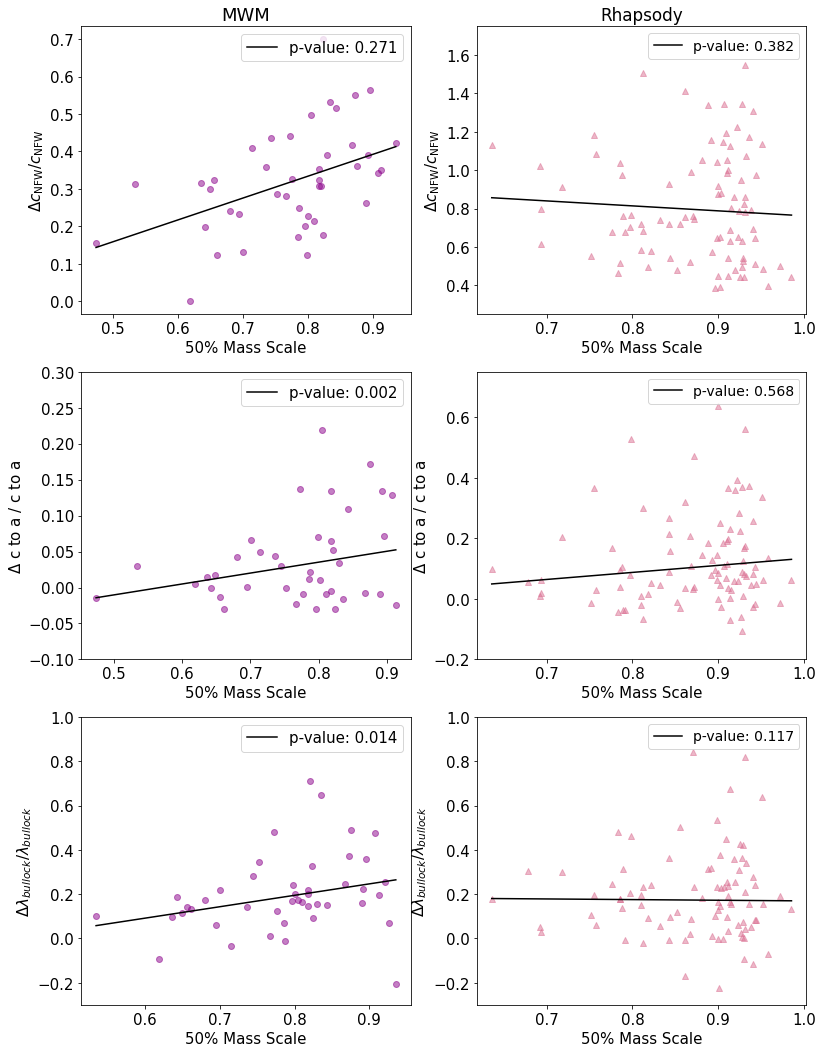

In [60]:
print("FRACTIONAL CHANGE 90 mass scale")
prop = mwm_90_mass_scale#df_og_mmmz['sub_mass_far']/df_og_mmmz['sub_mass']
ns = df_ns
ws = df_all

cut = np.logical_and(prop<.99,prop>.0)
srtd = np.argsort(np.array(prop)[cut])
d_shape = (ns['calc_shape']-ws['calc_shape'])/ws['calc_shape']
d_c = (ns['calc_cs']-ws['calc_cs'])/ws['calc_cs']
d_spin = (np.log10(ns['calc_spin'])-np.log10(ws['calc_spin']))/np.log10(ws['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.35,np.array(d_shape)[cut][srtd]>-.1)


smpls = boot(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('mwm shape')
print(pearsonr(np.array(d_shape),np.array(prop)))
print(spearmanr(np.array(d_shape),np.array(prop)))

shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(prop)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_shape],smpls)
#print("mwm HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),round(shape_b,3),round(shape_b_err,3)))


#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<.99,np.array(d_c)[cut][srtd]>.0)

smpls = boot(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('mwm c')
print(pearsonr(np.array(d_c),np.array(prop)))
print(spearmanr(np.array(d_c),np.array(prop)))

c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(prop)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(prop)[cut][srtd][cut_c],smpls)
#print("mwm HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.99,np.array(d_spin)[cut][srtd]>-.5)

smpls = boot(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)

print('mwm spin')
print(pearsonr(np.array(d_spin),np.array(prop)))
print(spearmanr(np.array(d_spin),np.array(prop)))

spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(prop)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(mwm_50_mass_scale)[cut][srtd][cut_spin],smpls)
#print("mwm HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),round(spin_b_err,3)))


re_srtd=np.argsort(prop)

widths = [6,6]
gs_kw = dict(width_ratios=widths)
fig, (row1,row2,row3)=plt.subplots(ncols=2, nrows=3,gridspec_kw=gs_kw,figsize=(13,18))
plt.rcParams['axes.facecolor'] = '1.'

row2[0].scatter(np.array(prop)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='darkmagenta',alpha=0.5)
row2[0].plot(np.array(prop)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.002')#{}'.format(round(shape_hub.bse[0],3)))
row2[0].set_xlabel('50% Mass Scale')
row2[0].set_ylabel('$\Delta$ c to a / c to a')
row2[0].set_ylim(-.1,.3)
row2[0].legend(loc=1)

row1[0].scatter(np.array(prop)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='darkmagenta',alpha=0.5)
row1[0].plot(np.array(prop)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),
        #round(c_b,3),round(c_b_err,3)))
        label='p-value: 0.271')#{}'.format(round(c_hub.bse[0],3)))
row1[0].set_xlabel('50% Mass Scale')
row1[0].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[0].set_title('MWM')
row1[0].legend(loc=1)

row3[0].scatter(np.array(prop)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='darkmagenta',alpha=0.5)
#row1[2].plot(mass_frac_rhap[re_srtd],spin_line_y_ransac[re_srtd])
row3[0].plot(np.array(prop)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),
        #round(spin_b,3),round(spin_b_err,3)))
        label='p-value: 0.014')#{}'.format(round(spin_hub.bse[0],3)))
row3[0].set_xlabel('50% Mass Scale')
row3[0].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[0].legend(loc=1)
row3[0].set_ylim(-0.3,1.0)


plt.legend()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)
print("FRACTIONAL CHANGE(Mass Scale)")
rhap_mass_scale = np.load('rhapsody_90mass_scale.npy')
cut = np.logical_and(rhap_mass_scale<.99,rhap_mass_scale>0.6)
srtd = np.argsort(np.array(rhap_mass_scale)[cut])
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])

#print('SHAPE')
cut_shape = np.logical_and(np.array(d_shape)[cut][srtd]<.85,np.array(d_shape)[cut][srtd]>-.25)


smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],100)

print('rhap shape')
print(pearsonr(np.array(d_shape),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_shape),np.array(rhap_mass_scale)))


shape_hub = rlm(np.array(d_shape)[cut][srtd][cut_shape],np.array(rhap_mass_scale)[cut][srtd][cut_shape],print_res=False)
shape_m, shape_b = shape_hub.params[1],shape_hub.params[0]
#shape_m_err, shape_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_shape],smpls)
#print("rhap HuberT: shape m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),2*round(shape_m_err,3),round(shape_b,3),2*round(shape_b_err,3)))



#print('CONCENTRATION')
cut_c = np.logical_and(np.array(d_c)[cut][srtd]<1.6,np.array(d_c)[cut][srtd]>0.25)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],100)

print('rhap c')
print(pearsonr(np.array(d_c),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_spin),np.array(rhap_mass_scale)))


c_hub = rlm(np.array(d_c)[cut][srtd][cut_c],np.array(rhap_mass_scale)[cut][srtd][cut_c],print_res=False)
c_m, c_b = c_hub.params[1],c_hub.params[0]
#c_m_err, c_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_c],smpls)
#print("rhap HuberT: c m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),2*round(c_m_err,3),round(c_b,3),2*round(c_b_err,3)))


#print('SPIN')
cut_spin = np.logical_and(np.array(d_spin)[cut][srtd]<.85,np.array(d_spin)[cut][srtd]>-12.1)

smpls = boot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],100)


print('rhap spin')
print(pearsonr(np.array(d_spin),np.array(rhap_mass_scale)))
print(spearmanr(np.array(d_spin),np.array(rhap_mass_scale)))


spin_hub = rlm(np.array(d_spin)[cut][srtd][cut_spin],np.array(rhap_mass_scale)[cut][srtd][cut_spin],print_res=False)
spin_m, spin_b = spin_hub.params[1],spin_hub.params[0]
#spin_m_err, spin_b_err = get_hub_err(np.array(rhap_mass_scale)[cut][srtd][cut_spin],smpls)
#print("Rhap HuberT: spin m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),2*round(spin_m_err,3),round(spin_b,3),2*round(spin_b_err,3)))


re_srtd=np.argsort(rhap_mass_scale)


#ax1 = fig.add_subplot(spec[0, 0])
row2[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_shape],np.array(d_shape)[cut][srtd][cut_shape],
        color='palevioletred',marker='^',alpha=0.5)
row2[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_shape],shape_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(shape_m,3),round(shape_m_err,3),
        #round(shape_b,3),round(shape_b_err,3)))
        label='p-value: 0.568')#{}'.format(round(shape_hub.bse[0],3)))
row2[1].set_xlabel('50% Mass Scale')
row2[1].set_ylabel('$\Delta$ c to a / c to a')
row2[1].set_ylim(-.2,.75)
row2[1].legend(loc=1)

#ax2 = fig.add_subplot(spec[0, 1])
row1[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_c],np.array(d_c)[cut][srtd][cut_c],
        color='palevioletred',marker='^',alpha=0.5)
row1[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_c],c_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(c_m,3),round(c_m_err,3),round(c_b,3),
        #round(c_b_err,3)))
        label='p-value: 0.382')#{}'.format(round(c_hub.bse[0],3)))
row1[1].set_xlabel('50% Mass Scale')
row1[1].set_ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
row1[1].set_ylim(.25,1.75)
row1[1].set_title('Rhapsody')
row1[1].legend(loc=1)

row3[1].scatter(np.array(rhap_mass_scale)[cut][srtd][cut_spin],np.array(d_spin)[cut][srtd][cut_spin],
        color='palevioletred',marker='^',alpha=0.5)
row3[1].plot(np.array(rhap_mass_scale)[cut][srtd][cut_spin],spin_hub.fittedvalues,c='black',
        #label="m:{}+/-{}, b:{}+/-{}".format(round(spin_m,3),round(spin_m_err,3),round(spin_b,3),
        #round(spin_b_err,3)))
        label='p-value: 0.117')#{}'.format(round(spin_hub.bse[0],3)))
row3[1].set_xlabel('50% Mass Scale')
row3[1].set_ylabel('$\Delta\lambda_{bullock}$/$\lambda_{bullock}$ ')
row3[1].set_ylim(-.3,1.0)
row3[1].legend(loc=1)


#plt.savefig('fractional_change_v_50_mass_scale.png',bbox_inches='tight')
plt.show()



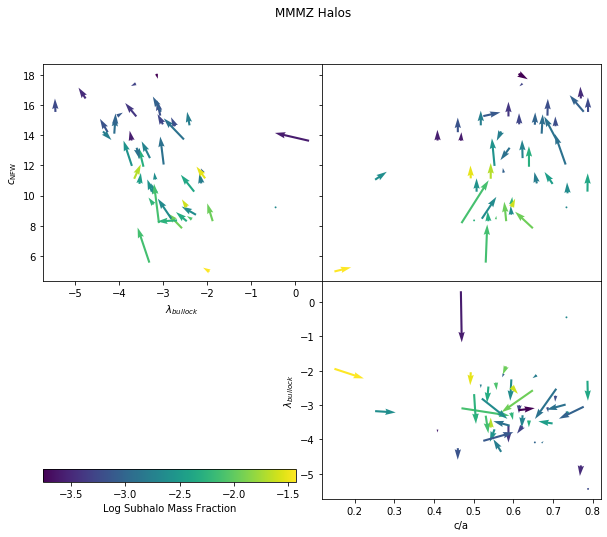

In [23]:
plt.rcParams['axes.facecolor'] = '1'
x = df_no_ss['calc_shape']
#x = df_og_mmmz['host_shapes']
x_direc = df_ns['calc_shape']
#x_direc = df_cat['host_shapes']
y = df_all['calc_spin']
#y = df_og_mmmz['host_spins']
y_direc = df_ns['calc_spin']
#y_direc = df_cat['host_spins']
z = df_all['calc_cs']
#z = df_og_mmmz['host_cs']
z_direc = df_ns['calc_cs']
#z_direc = df_cat['host_cs']

fig, axs = plt.subplots(2, 2,figsize = (10,8))
a=axs[0, 0].quiver(np.log10(y),z,np.log10(y_direc)-np.log10(y),z_direc-z,np.log10(mass_frac_mmmz),angles='xy',scale_units='xy')
axs[0, 1].quiver(x,z,x_direc-x,z_direc-z,np.log10(mass_frac_mmmz),angles='xy',scale_units='xy')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x,np.log10(y),x_direc-x,np.log10(y_direc)-np.log10(y),np.log10(mass_frac_mmmz),angles='xy',scale_units='xy')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.delaxes(axs[1,0])
plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)

fig.colorbar(a,ax=[axs[1, 0]],label='Log Subhalo Mass Fraction',orientation="horizontal")
fig.suptitle('MMMZ Halos')
plt.savefig('mmmz_quiver.png')

0.7380988243101487 9.292349929195785 0.7431749712607877 9.3204509216191


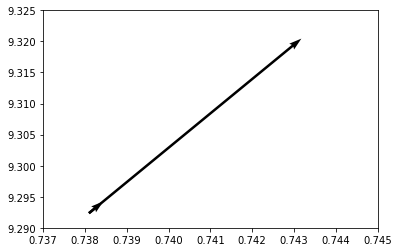

In [229]:
#plt.quiver(x[0]/x[0],z[0]/z[0],x_direc[0]/x[0],z_direc[0]/z[0],scale=1)
plt.quiver(x[1],z[1],x_direc[1]-x[1],z_direc[1]-z[1],angles='xy',scale_units='xy',scale=1)
plt.quiver(x[1],z[1],x_direc[1]-x[1],z_direc[1]-z[1],angles='xy',scale_units='xy')
plt.xlim(0.737,0.745)
plt.ylim(9.29,9.325)
#print(x[0]/x[0],z[0]/z[0],x_direc[0]/x[0],z_direc[0]/z[0])
print(x[1],z[1],x_direc[1],z_direc[1])

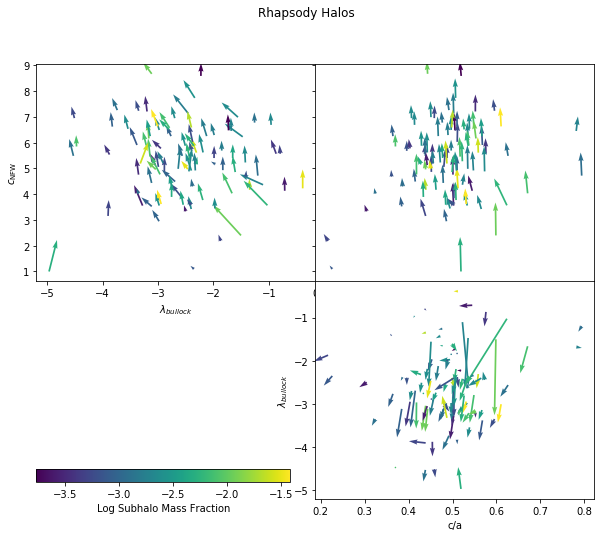

In [140]:
plt.rcParams['axes.facecolor'] = '1'

#x = df_no_ss_rm['calc_shape']
x = df_no_ss_rm['calc_shape']
x_direc = df_ns_rhap_rm['calc_shape']
#y = df_all_rhap_rm['calc_spin']
y = df_all_rhap_rm['calc_spin']
y_direc = df_ns_rhap_rm['calc_spin']
#z = df_all_rhap_rm['calc_cs']
z = df_all_rhap_rm['calc_cs']
z_direc = df_ns_rhap_rm['calc_cs']

fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])
a=axs[0, 0].quiver(np.log(y),z,np.log(y_direc)-np.log(y),z_direc-z,np.log(mass_frac_mmmz),angles='xy',scale_units='xy')
axs[0, 1].quiver(x,z,x_direc-x,z_direc-z,np.log(mass_frac_mmmz),angles='xy',scale_units='xy')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x,np.log(y),x_direc-x,np.log(y_direc)-np.log(y),np.log(mass_frac_mmmz),angles='xy',scale_units='xy')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)

fig.colorbar(a,ax=[axs[1, 0]],label='Log Subhalo Mass Fraction',orientation="horizontal")
plt.suptitle('Rhapsody Halos')
plt.savefig('rhap_quiver.png')

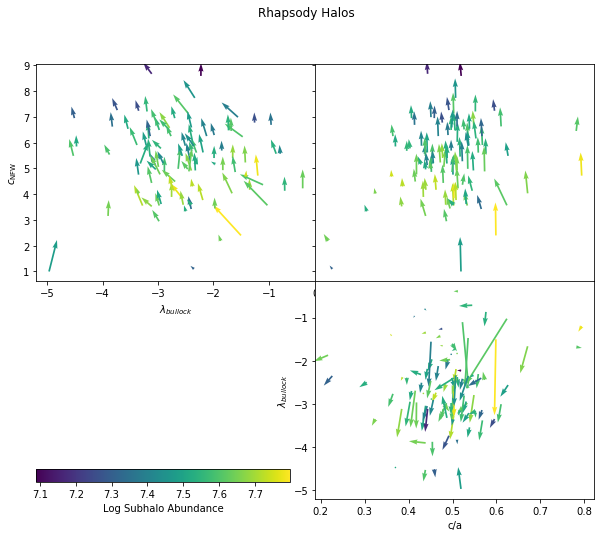

In [141]:
plt.rcParams['axes.facecolor'] = '1'

#x = df_no_ss_rm['calc_shape']
x = df_no_ss_rm['calc_shape']
x_direc = df_ns_rhap_rm['calc_shape']
#y = df_all_rhap_rm['calc_spin']
y = df_all_rhap_rm['calc_spin']
y_direc = df_ns_rhap_rm['calc_spin']
#z = df_all_rhap_rm['calc_cs']
z = df_all_rhap_rm['calc_cs']
z_direc = df_ns_rhap_rm['calc_cs']

fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])
a=axs[0, 0].quiver(np.log(y),z,np.log(y_direc)-np.log(y),z_direc-z,np.log(df_all_rhap_rock['num_subs']),angles='xy',scale_units='xy')
axs[0, 1].quiver(x,z,x_direc-x,z_direc-z,np.log(df_all_rhap_rock['num_subs']),angles='xy',scale_units='xy')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x,np.log(y),x_direc-x,np.log(y_direc)-np.log(y),np.log(df_all_rhap_rock['num_subs']),angles='xy',scale_units='xy')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)

fig.colorbar(a,ax=[axs[1, 0]],label='Log Subhalo Abundance',orientation="horizontal")
plt.suptitle('Rhapsody Halos')
plt.savefig('rhap_quiver_num_subs.png')

Text(0.5, 0.98, 'Rhapsody Halos')

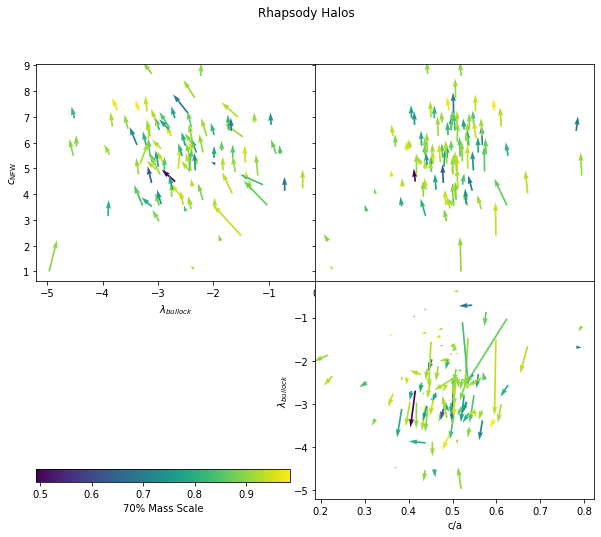

In [142]:
plt.rcParams['axes.facecolor'] = '1'

#x = df_no_ss_rm['calc_shape']
x = df_no_ss_rm['calc_shape']
x_direc = df_ns_rhap_rm['calc_shape']
#y = df_all_rhap_rm['calc_spin']
y = df_all_rhap_rm['calc_spin']
y_direc = df_ns_rhap_rm['calc_spin']
#z = df_all_rhap_rm['calc_cs']
z = df_all_rhap_rm['calc_cs']
z_direc = df_ns_rhap_rm['calc_cs']

fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])
a=axs[0, 0].quiver(np.log(y),z,np.log(y_direc)-np.log(y),z_direc-z,rhap_mass_scale,angles='xy',scale_units='xy')
axs[0, 1].quiver(x,z,x_direc-x,z_direc-z,rhap_mass_scale,angles='xy',scale_units='xy')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x,np.log(y),x_direc-x,np.log(y_direc)-np.log(y),rhap_mass_scale,angles='xy',scale_units='xy')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)

fig.colorbar(a,ax=[axs[1, 0]],label='70% Mass Scale',orientation="horizontal")
plt.suptitle('Rhapsody Halos')
#plt.savefig('rhap_quiver_avg_sat_dist.png')

Text(0.5, 0.98, 'MMMZ Halos')

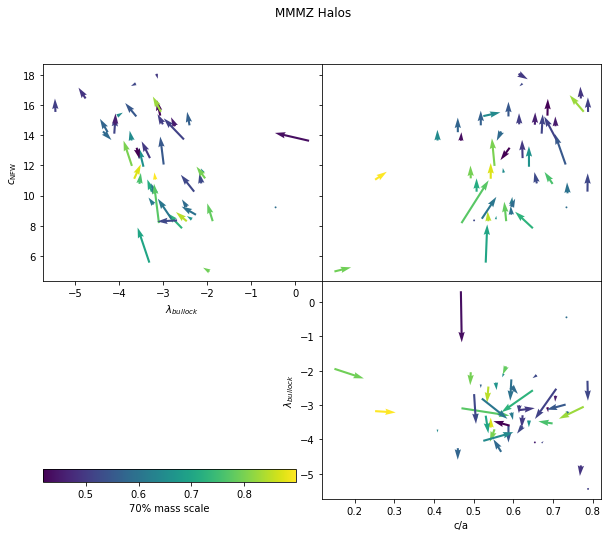

In [24]:
plt.rcParams['axes.facecolor'] = '1'
x = df_no_ss['calc_shape']
#x = df_og_mmmz['host_shapes']
x_direc = df_ns['calc_shape']
#x_direc = df_cat['host_shapes']
y = df_all['calc_spin']
#y = df_og_mmmz['host_spins']
y_direc = df_ns['calc_spin']
#y_direc = df_cat['host_spins']
z = df_all['calc_cs']
#z = df_og_mmmz['host_cs']
z_direc = df_ns['calc_cs']
#z_direc = df_cat['host_cs']

fig, axs = plt.subplots(2, 2,figsize = (10,8))
a=axs[0, 0].quiver(np.log(y),z,np.log(y_direc)-np.log(y),z_direc-z,mwm_mass_scale,angles='xy',scale_units='xy')
axs[0, 1].quiver(x,z,x_direc-x,z_direc-z,mwm_mass_scale,angles='xy',scale_units='xy')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x,np.log(y),x_direc-x,np.log(y_direc)-np.log(y),mwm_mass_scale,angles='xy',scale_units='xy')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.delaxes(axs[1,0])
plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)

fig.colorbar(a,ax=[axs[1, 0]],label='70% mass scale',orientation="horizontal")
fig.suptitle('MMMZ Halos')
#plt.savefig('mmmz_quiver_lmm.png')

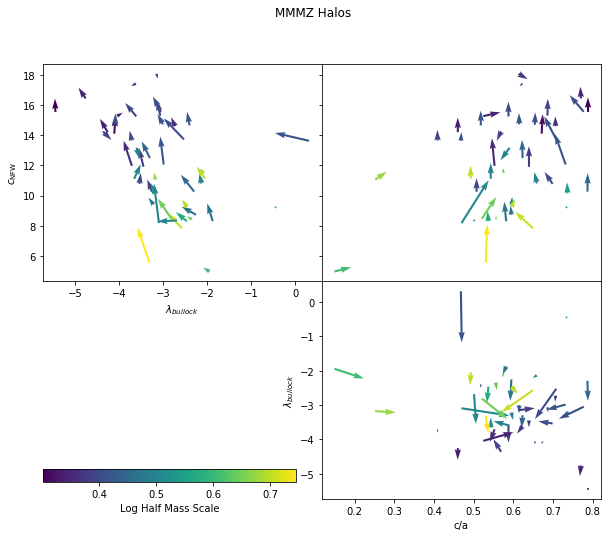

In [25]:
plt.rcParams['axes.facecolor'] = '1'
x = df_no_ss['calc_shape']
#x = df_og_mmmz['host_shapes']
x_direc = df_ns['calc_shape']
#x_direc = df_cat['host_shapes']
y = df_all['calc_spin']
#y = df_og_mmmz['host_spins']
y_direc = df_ns['calc_spin']
#y_direc = df_cat['host_spins']
z = df_all['calc_cs']
#z = df_og_mmmz['host_cs']
z_direc = df_ns['calc_cs']
#z_direc = df_cat['host_cs']

fig, axs = plt.subplots(2, 2,figsize = (10,8))
a=axs[0, 0].quiver(np.log(y),z,np.log(y_direc)-np.log(y),z_direc-z,df_og_mmmz['scale_hm'],angles='xy',scale_units='xy')
axs[0, 1].quiver(x,z,x_direc-x,z_direc-z,df_og_mmmz['scale_hm'],angles='xy',scale_units='xy')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x,np.log(y),x_direc-x,np.log(y_direc)-np.log(y),df_og_mmmz['scale_hm'],angles='xy',scale_units='xy')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.delaxes(axs[1,0])
plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)

fig.colorbar(a,ax=[axs[1, 0]],label='Log Half Mass Scale',orientation="horizontal")
fig.suptitle('MMMZ Halos')
plt.savefig('mmmz_quiver_hm.png')

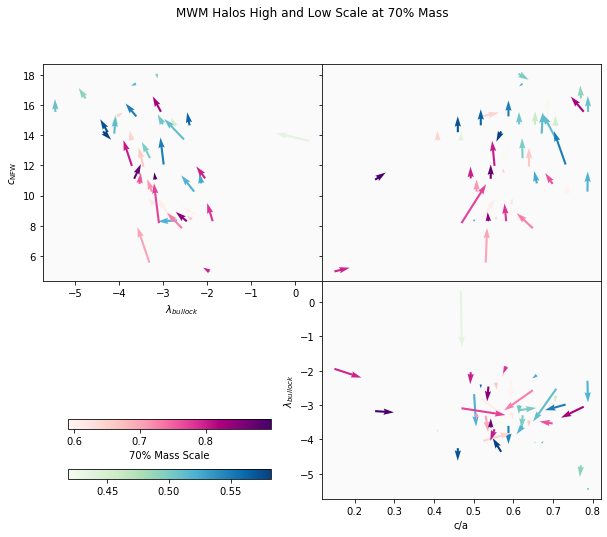

High vs Low Group Shape: KstestResult(statistic=0.2608695652173913, pvalue=0.4217817995595472), KstestResult(statistic=0.19047619047619047, pvalue=0.8530789718547532)

High vs Low Group Spin: KstestResult(statistic=0.391304347826087, pvalue=0.058268826492191214), KstestResult(statistic=0.38095238095238093, pvalue=0.09481656218610322)

High vs Low Group Cnfw: KstestResult(statistic=0.6086956521739131, pvalue=0.0002676202342498227), KstestResult(statistic=0.6666666666666666, pvalue=0.00010024313356518223)

Correlation b/w Shape and Cnfw [[1.         0.45893875]
 [0.45893875 1.        ]],

Correlation b/w Shape and Spin [[ 1.         -0.07850888]
 [-0.07850888  1.        ]],

Correlation b/w Cnfw and Spin [[ 1.         -0.06795834]
 [-0.06795834  1.        ]],


In [27]:
low = np.argsort(mwm_mass_scale)[0:21]
high = np.argsort(mwm_mass_scale)[22:45]

#plt.rcParams['axes.facecolor'] = '1'
plt.rcParams['axes.facecolor'] = '.98'
x_low = df_no_ss['calc_shape'][low]
x_direc_low = df_ns['calc_shape'][low]
y_low = df_all['calc_spin'][low]
y_direc_low = df_ns['calc_spin'][low]
z_low = df_all['calc_cs'][low]
z_direc_low = df_ns['calc_cs'][low]

"""
x_mid = df_all_rhap_rm['calc_shape'][mid]
x_direc_mid = df_ns_rhap_rm['calc_shape'][mid]
y_mid = df_all_rhap_rm['calc_spin'][mid]
y_direc_mid = df_ns_rhap_rm['calc_spin'][mid]
z_mid = df_all_rhap_rm['calc_cs'][mid]
z_direc_mid = df_ns_rhap_rm['calc_cs'][mid]
"""
x_high = df_no_ss['calc_shape'][high]
x_direc_high = df_ns['calc_shape'][high]
y_high = df_all['calc_spin'][high]
y_direc_high = df_ns['calc_spin'][high]
z_high = df_all['calc_cs'][high]
z_direc_high = df_ns['calc_cs'][high]

fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])
a=axs[0, 0].quiver(np.log(y_low),z_low,np.log(y_direc_low)-np.log(y_low),z_direc_low-z_low,mwm_mass_scale[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].quiver(x_low,z_low,x_direc_low-x_low,z_direc_low-z_low,mwm_mass_scale[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_low,np.log(y_low),x_direc_low-x_low,np.log(y_direc_low)-np.log(y_low),mwm_mass_scale[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(a,ax=[axs[1, 0]],orientation="horizontal",cmap='GnBu',shrink=0.8)

"""
b=axs[0, 0].quiver(np.log(y_mid),z_mid,np.log(y_direc_mid)-np.log(y_mid),z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].quiver(x_mid,z_mid,x_direc_mid-x_mid,z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_mid,np.log(y_mid),x_direc_mid-x_mid,np.log(y_direc_mid)-np.log(y_mid),mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(b,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8)
"""
c=axs[0, 0].quiver(np.log(y_high),z_high,np.log(y_direc_high)-np.log(y_high),z_direc_high-z_high,mwm_mass_scale[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].quiver(x_high,z_high,x_direc_high-x_high,z_direc_high-z_high,mwm_mass_scale[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_high,np.log(y_high),x_direc_high-x_high,np.log(y_direc_high)-np.log(y_high),mwm_mass_scale[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(c,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8,label='70% Mass Scale')

plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)
plt.suptitle('MWM Halos High and Low Scale at 70% Mass')
#plt.savefig('rhap_quiver_2_mass_groups.png')
plt.show()

print("High vs Low Group Shape: {}, {}".format(ks_2samp(df_all['calc_shape'][high],df_ns['calc_shape'][high]),ks_2samp(df_all['calc_shape'][low],df_ns['calc_shape'][low])))
print()

print("High vs Low Group Spin: {}, {}".format(ks_2samp(df_all['calc_spin'][high],df_ns['calc_spin'][high]),ks_2samp(df_all['calc_spin'][low],df_ns['calc_spin'][low])))
print()

print("High vs Low Group Cnfw: {}, {}".format(ks_2samp(df_all['calc_cs'][high],df_ns['calc_cs'][high]),ks_2samp(df_all['calc_cs'][low],df_ns['calc_cs'][low])))

print()
print("Correlation b/w Shape and Cnfw {},".format(np.corrcoef(df_all['calc_shape'],df_all['calc_cs'])))
print()
print("Correlation b/w Shape and Spin {},".format(np.corrcoef(df_all['calc_shape'],df_all['calc_spin'])))
print()
print("Correlation b/w Cnfw and Spin {},".format(np.corrcoef(df_all['calc_cs'],df_all['calc_spin'])))

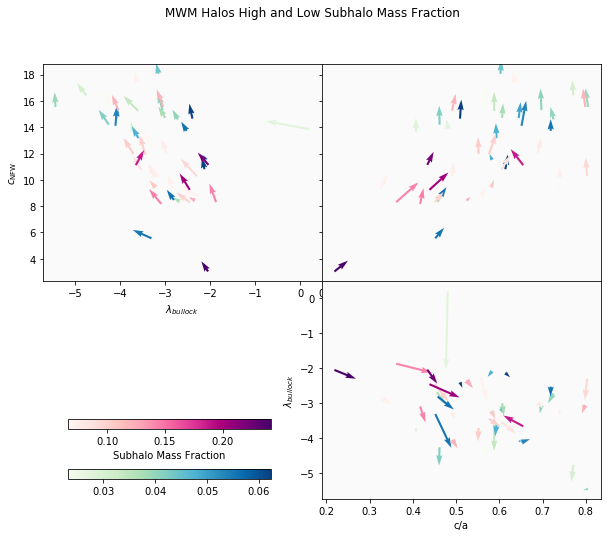

High vs Low Group Shape: KstestResult(statistic=0.21739130434782608, pvalue=0.6601009653401484), KstestResult(statistic=0.14285714285714285, pvalue=0.9870441861918785)

High vs Low Group Spin: KstestResult(statistic=0.4782608695652174, pvalue=0.00945186008028569), KstestResult(statistic=0.3333333333333333, pvalue=0.1963120402389556)

High vs Low Group Cnfw: KstestResult(statistic=0.6086956521739131, pvalue=0.0002676202342498227), KstestResult(statistic=0.6666666666666666, pvalue=0.00010024313356518223)

Correlation b/w Shape and Cnfw [[1.         0.54368662]
 [0.54368662 1.        ]],

Correlation b/w Shape and Spin [[ 1.         -0.06662516]
 [-0.06662516  1.        ]],

Correlation b/w Cnfw and Spin [[ 1.         -0.07265076]
 [-0.07265076  1.        ]],


In [202]:
low = np.argsort(mass_frac_mmmz)[0:21]
high = np.argsort(mass_frac_mmmz)[22:45]

#plt.rcParams['axes.facecolor'] = '1'
plt.rcParams['axes.facecolor'] = '.98'
x_low = df_all['calc_shape'][low]
x_direc_low = df_ns['calc_shape'][low]
y_low = df_all['calc_spin'][low]
y_direc_low = df_ns['calc_spin'][low]
z_low = df_all['calc_cs'][low]
z_direc_low = df_ns['calc_cs'][low]

"""
x_mid = df_all_rhap_rm['calc_shape'][mid]
x_direc_mid = df_ns_rhap_rm['calc_shape'][mid]
y_mid = df_all_rhap_rm['calc_spin'][mid]
y_direc_mid = df_ns_rhap_rm['calc_spin'][mid]
z_mid = df_all_rhap_rm['calc_cs'][mid]
z_direc_mid = df_ns_rhap_rm['calc_cs'][mid]
"""
x_high = df_all['calc_shape'][high]
x_direc_high = df_ns['calc_shape'][high]
y_high = df_all['calc_spin'][high]
y_direc_high = df_ns['calc_spin'][high]
z_high = df_all['calc_cs'][high]
z_direc_high = df_ns['calc_cs'][high]

fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])
a=axs[0, 0].quiver(np.log(y_low),z_low,np.log(y_direc_low)-np.log(y_low),z_direc_low-z_low,mass_frac_mmmz[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].quiver(x_low,z_low,x_direc_low-x_low,z_direc_low-z_low,mass_frac_mmmz[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_low,np.log(y_low),x_direc_low-x_low,np.log(y_direc_low)-np.log(y_low),mass_frac_mmmz[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(a,ax=[axs[1, 0]],orientation="horizontal",cmap='GnBu',shrink=0.8)

"""
b=axs[0, 0].quiver(np.log(y_mid),z_mid,np.log(y_direc_mid)-np.log(y_mid),z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].quiver(x_mid,z_mid,x_direc_mid-x_mid,z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_mid,np.log(y_mid),x_direc_mid-x_mid,np.log(y_direc_mid)-np.log(y_mid),mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(b,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8)
"""
c=axs[0, 0].quiver(np.log(y_high),z_high,np.log(y_direc_high)-np.log(y_high),z_direc_high-z_high,mass_frac_mmmz[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].quiver(x_high,z_high,x_direc_high-x_high,z_direc_high-z_high,mass_frac_mmmz[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_high,np.log(y_high),x_direc_high-x_high,np.log(y_direc_high)-np.log(y_high),mass_frac_mmmz[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(c,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8,label='Subhalo Mass Fraction')

plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)
plt.suptitle('MWM Halos High and Low Subhalo Mass Fraction')
#plt.savefig('rhap_quiver_2_mass_groups.png')
plt.show()

print("High vs Low Group Shape: {}, {}".format(ks_2samp(df_all['calc_shape'][high],df_ns['calc_shape'][high]),ks_2samp(df_all['calc_shape'][low],df_ns['calc_shape'][low])))
print()

print("High vs Low Group Spin: {}, {}".format(ks_2samp(df_all['calc_spin'][high],df_ns['calc_spin'][high]),ks_2samp(df_all['calc_spin'][low],df_ns['calc_spin'][low])))
print()

print("High vs Low Group Cnfw: {}, {}".format(ks_2samp(df_all['calc_cs'][high],df_ns['calc_cs'][high]),ks_2samp(df_all['calc_cs'][low],df_ns['calc_cs'][low])))

print()
print("Correlation b/w Shape and Cnfw {},".format(np.corrcoef(df_all['calc_shape'],df_all['calc_cs'])))
print()
print("Correlation b/w Shape and Spin {},".format(np.corrcoef(df_all['calc_shape'],df_all['calc_spin'])))
print()
print("Correlation b/w Cnfw and Spin {},".format(np.corrcoef(df_all['calc_cs'],df_all['calc_spin'])))

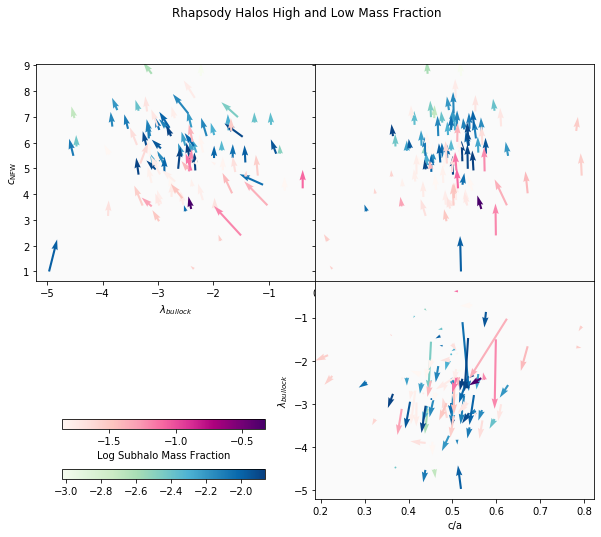

High vs Low Group Shape: KstestResult(statistic=0.1702127659574468, pvalue=0.5083350291194705), KstestResult(statistic=0.16666666666666666, pvalue=0.5220694941428086)

High vs Low Group Spin: KstestResult(statistic=0.3829787234042553, pvalue=0.0018344083683356387), KstestResult(statistic=0.375, pvalue=0.0021345842830588885)

High vs Low Group Cnfw: KstestResult(statistic=0.7872340425531915, pvalue=1.1122901519258771e-14), KstestResult(statistic=0.9375, pvalue=4.4406685957464545e-23)

Correlation b/w Shape and Cnfw [[1.        0.2027364]
 [0.2027364 1.       ]],

Correlation b/w Shape and Spin [[1.         0.16569944]
 [0.16569944 1.        ]],

Correlation b/w Cnfw and Spin [[ 1.         -0.07958666]
 [-0.07958666  1.        ]],


In [83]:
low = np.argsort(mass_frac_rhap)[0:48]
mid = np.argsort(mass_frac_rhap)[32:64]
high = np.argsort(mass_frac_rhap)[49:96]

#plt.rcParams['axes.facecolor'] = '1'
plt.rcParams['axes.facecolor'] = '.98'
x_low = df_no_ss_rm['calc_shape'][low]
x_direc_low = df_ns_rhap_rm['calc_shape'][low]
y_low = df_all_rhap_rm['calc_spin'][low]
y_direc_low = df_ns_rhap_rm['calc_spin'][low]
z_low = df_all_rhap_rm['calc_cs'][low]
z_direc_low = df_ns_rhap_rm['calc_cs'][low]

"""
x_mid = df_no_ss_rm['calc_shape'][mid]
x_direc_mid = df_ns_rhap_rm['calc_shape'][mid]
y_mid = df_all_rhap_rm['calc_spin'][mid]
y_direc_mid = df_ns_rhap_rm['calc_spin'][mid]
z_mid = df_all_rhap_rm['calc_cs'][mid]
z_direc_mid = df_ns_rhap_rm['calc_cs'][mid]
"""
x_high = df_no_ss_rm['calc_shape'][high]
x_direc_high = df_ns_rhap_rm['calc_shape'][high]
y_high = df_all_rhap_rm['calc_spin'][high]
y_direc_high = df_ns_rhap_rm['calc_spin'][high]
z_high = df_all_rhap_rm['calc_cs'][high]
z_direc_high = df_ns_rhap_rm['calc_cs'][high]

fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])
a=axs[0, 0].quiver(np.log(y_low),z_low,np.log(y_direc_low)-np.log(y_low),z_direc_low-z_low,np.log(mass_frac_rhap[low]),angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].quiver(x_low,z_low,x_direc_low-x_low,z_direc_low-z_low,np.log(mass_frac_rhap[low]),angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_low,np.log(y_low),x_direc_low-x_low,np.log(y_direc_low)-np.log(y_low),np.log(mass_frac_rhap[low]),angles='xy',scale_units='xy',cmap='GnBu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(a,ax=[axs[1, 0]],orientation="horizontal",cmap='GnBu',shrink=0.8)

"""
b=axs[0, 0].quiver(np.log(y_mid),z_mid,np.log(y_direc_mid)-np.log(y_mid),z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].quiver(x_mid,z_mid,x_direc_mid-x_mid,z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_mid,np.log(y_mid),x_direc_mid-x_mid,np.log(y_direc_mid)-np.log(y_mid),mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(b,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8)
"""
c=axs[0, 0].quiver(np.log(y_high),z_high,np.log(y_direc_high)-np.log(y_high),z_direc_high-z_high,np.log(mass_frac_rhap[high]),angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].quiver(x_high,z_high,x_direc_high-x_high,z_direc_high-z_high,np.log(mass_frac_rhap[high]),angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_high,np.log(y_high),x_direc_high-x_high,np.log(y_direc_high)-np.log(y_high),np.log(mass_frac_rhap[high]),angles='xy',scale_units='xy',cmap='RdPu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(c,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8,label='Log Subhalo Mass Fraction')

plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)
plt.suptitle('Rhapsody Halos High and Low Mass Fraction')
plt.savefig('rhap_quiver_2_mass_groups.png')
plt.show()

print("High vs Low Group Shape: {}, {}".format(ks_2samp(df_no_ss_rm['calc_shape'][high],df_ns_rhap_rm['calc_shape'][high]),ks_2samp(df_no_ss_rm['calc_shape'][low],df_ns_rhap_rm['calc_shape'][low])))
print()

print("High vs Low Group Spin: {}, {}".format(ks_2samp(df_all_rhap_rm['calc_spin'][high],df_ns_rhap_rm['calc_spin'][high]),ks_2samp(df_all_rhap_rm['calc_spin'][low],df_ns_rhap_rm['calc_spin'][low])))
print()

print("High vs Low Group Cnfw: {}, {}".format(ks_2samp(df_all_rhap_rm['calc_cs'][high],df_ns_rhap_rm['calc_cs'][high]),ks_2samp(df_all_rhap_rm['calc_cs'][low],df_ns_rhap_rm['calc_cs'][low])))

print()
print("Correlation b/w Shape and Cnfw {},".format(np.corrcoef(df_no_ss_rm['calc_shape'],df_all_rhap_rm['calc_cs'])))
print()
print("Correlation b/w Shape and Spin {},".format(np.corrcoef(df_no_ss_rm['calc_shape'],df_all_rhap_rm['calc_spin'])))
print()
print("Correlation b/w Cnfw and Spin {},".format(np.corrcoef(df_all_rhap_rm['calc_cs'],df_all_rhap_rm['calc_spin'])))

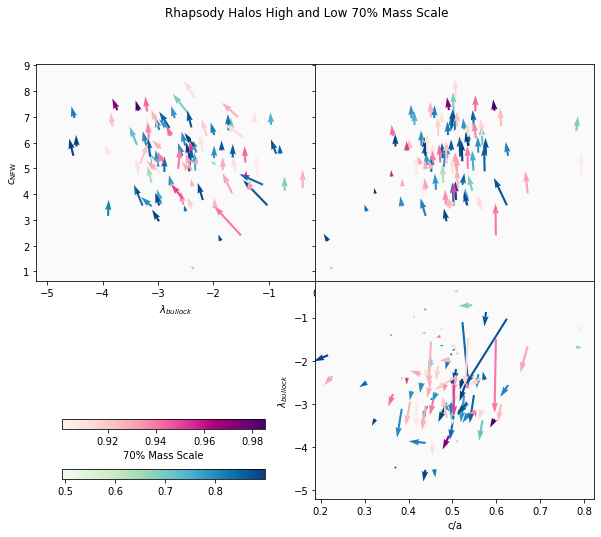

High vs Low Group Shape: KstestResult(statistic=0.14893617021276595, pvalue=0.6800174807197423), KstestResult(statistic=0.1875, pvalue=0.3707025699757679)

High vs Low Group Spin: KstestResult(statistic=0.3617021276595745, pvalue=0.003974551461205535), KstestResult(statistic=0.4166666666666667, pvalue=0.0004076137678731237)

High vs Low Group Cnfw: KstestResult(statistic=0.851063829787234, pvalue=1.2592557972650149e-17), KstestResult(statistic=0.875, pvalue=2.881239004978172e-19)

Correlation b/w Shape and Cnfw [[1.        0.2027364]
 [0.2027364 1.       ]],

Correlation b/w Shape and Spin [[1.         0.16569944]
 [0.16569944 1.        ]],

Correlation b/w Cnfw and Spin [[ 1.         -0.07958666]
 [-0.07958666  1.        ]],


In [84]:
low = np.argsort(rhap_mass_scale)[0:48]
high = np.argsort(rhap_mass_scale)[49:96]

#plt.rcParams['axes.facecolor'] = '1'
plt.rcParams['axes.facecolor'] = '.98'
x_low = df_no_ss_rm['calc_shape'][low]
x_direc_low = df_ns_rhap_rm['calc_shape'][low]
y_low = df_all_rhap_rm['calc_spin'][low]
y_direc_low = df_ns_rhap_rm['calc_spin'][low]
z_low = df_all_rhap_rm['calc_cs'][low]
z_direc_low = df_ns_rhap_rm['calc_cs'][low]

"""
x_mid = df_no_ss_rm['calc_shape'][mid]
x_direc_mid = df_ns_rhap_rm['calc_shape'][mid]
y_mid = df_all_rhap_rm['calc_spin'][mid]
y_direc_mid = df_ns_rhap_rm['calc_spin'][mid]
z_mid = df_all_rhap_rm['calc_cs'][mid]
z_direc_mid = df_ns_rhap_rm['calc_cs'][mid]
"""
x_high = df_no_ss_rm['calc_shape'][high]
x_direc_high = df_ns_rhap_rm['calc_shape'][high]
y_high = df_all_rhap_rm['calc_spin'][high]
y_direc_high = df_ns_rhap_rm['calc_spin'][high]
z_high = df_all_rhap_rm['calc_cs'][high]
z_direc_high = df_ns_rhap_rm['calc_cs'][high]

fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])
a=axs[0, 0].quiver(np.log(y_low),z_low,np.log(y_direc_low)-np.log(y_low),z_direc_low-z_low,rhap_mass_scale[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].quiver(x_low,z_low,x_direc_low-x_low,z_direc_low-z_low,rhap_mass_scale[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_low,np.log(y_low),x_direc_low-x_low,np.log(y_direc_low)-np.log(y_low),rhap_mass_scale[low],angles='xy',scale_units='xy',cmap='GnBu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(a,ax=[axs[1, 0]],orientation="horizontal",cmap='GnBu',shrink=0.8)

"""
b=axs[0, 0].quiver(np.log(y_mid),z_mid,np.log(y_direc_mid)-np.log(y_mid),z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].quiver(x_mid,z_mid,x_direc_mid-x_mid,z_direc_mid-z_mid,mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_mid,np.log(y_mid),x_direc_mid-x_mid,np.log(y_direc_mid)-np.log(y_mid),mass_frac_rhap[mid],angles='xy',scale_units='xy',cmap='Reds')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(b,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8)
"""
c=axs[0, 0].quiver(np.log(y_high),z_high,np.log(y_direc_high)-np.log(y_high),z_direc_high-z_high,rhap_mass_scale[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].quiver(x_high,z_high,x_direc_high-x_high,z_direc_high-z_high,rhap_mass_scale[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(x_high,np.log(y_high),x_direc_high-x_high,np.log(y_direc_high)-np.log(y_high),rhap_mass_scale[high],angles='xy',scale_units='xy',cmap='RdPu')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(c,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8,label='70% Mass Scale')

plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)
plt.suptitle('Rhapsody Halos High and Low 70% Mass Scale')
#plt.savefig('rhap_quiver_2_mass_groups.png')
plt.show()

print("High vs Low Group Shape: {}, {}".format(ks_2samp(df_no_ss_rm['calc_shape'][high],df_ns_rhap_rm['calc_shape'][high]),ks_2samp(df_no_ss_rm['calc_shape'][low],df_ns_rhap_rm['calc_shape'][low])))
print()

print("High vs Low Group Spin: {}, {}".format(ks_2samp(df_all_rhap_rm['calc_spin'][high],df_ns_rhap_rm['calc_spin'][high]),ks_2samp(df_all_rhap_rm['calc_spin'][low],df_ns_rhap_rm['calc_spin'][low])))
print()

print("High vs Low Group Cnfw: {}, {}".format(ks_2samp(df_all_rhap_rm['calc_cs'][high],df_ns_rhap_rm['calc_cs'][high]),ks_2samp(df_all_rhap_rm['calc_cs'][low],df_ns_rhap_rm['calc_cs'][low])))

print()
print("Correlation b/w Shape and Cnfw {},".format(np.corrcoef(df_no_ss_rm['calc_shape'],df_all_rhap_rm['calc_cs'])))
print()
print("Correlation b/w Shape and Spin {},".format(np.corrcoef(df_no_ss_rm['calc_shape'],df_all_rhap_rm['calc_spin'])))
print()
print("Correlation b/w Cnfw and Spin {},".format(np.corrcoef(df_all_rhap_rm['calc_cs'],df_all_rhap_rm['calc_spin'])))

In [85]:
bins = np.linspace(np.min(np.log(mass_frac_rhap)),np.max(np.log(mass_frac_rhap)),48)
shape = []
shape_ns = []
spin = []
spin_ns = []
c = []
c_ns = []
frac = []
for i in range(47):
    shape.append(np.mean(df_no_ss_rm['calc_shape'][np.logical_and(np.log(mass_frac_rhap)<bins[i+1],np.log(mass_frac_rhap)>bins[i])]))
    spin.append(np.mean(df_all_rhap_rm['calc_spin'][np.logical_and(np.log(mass_frac_rhap)<bins[i+1],np.log(mass_frac_rhap)>bins[i])]))
    c.append(np.mean(df_all_rhap_rm['calc_cs'][np.logical_and(np.log(mass_frac_rhap)<bins[i+1],np.log(mass_frac_rhap)>bins[i])]))
    shape_ns.append(np.mean(df_ns_rhap_rm['calc_shape'][np.logical_and(np.log(mass_frac_rhap)<bins[i+1],np.log(mass_frac_rhap)>bins[i])]))
    spin_ns.append(np.mean(df_ns_rhap_rm['calc_spin'][np.logical_and(np.log(mass_frac_rhap)<bins[i+1],np.log(mass_frac_rhap)>bins[i])]))
    c_ns.append(np.mean(df_ns_rhap_rm['calc_cs'][np.logical_and(np.log(mass_frac_rhap)<bins[i+1],np.log(mass_frac_rhap)>bins[i])]))
    frac.append(np.mean(np.logical_and(np.log(mass_frac_rhap)<bins[i+1],np.log(mass_frac_rhap)>bins[i])))

shape = np.array(shape)
shape_ns = np.array(shape_ns)
spin = np.array(spin)
spin_ns = np.array(spin_ns)
c = np.array(c)
c_ns = np.array(c_ns)
frac = np.array(np.log(frac))

/anaconda3/envs/haloenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


/anaconda3/envs/haloenv/lib/python3.7/site-packages/matplotlib/quiver.py:748: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/anaconda3/envs/haloenv/lib/python3.7/site-packages/matplotlib/quiver.py:762: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


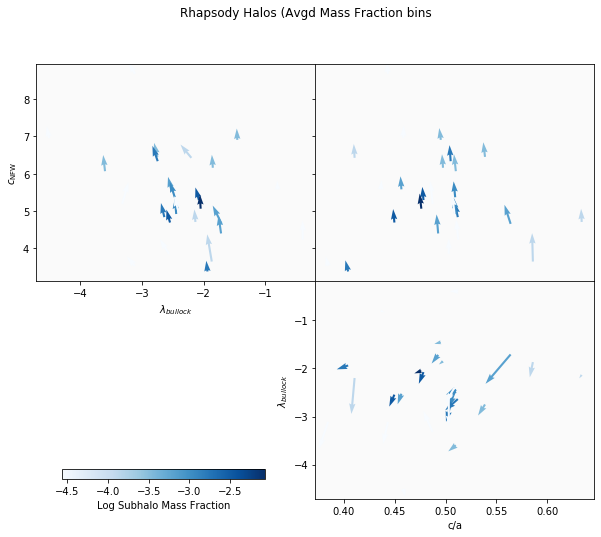

In [86]:
fig, axs = plt.subplots(2, 2,figsize = (10,8))
fig.delaxes(axs[1,0])

b = axs[0, 0].quiver(np.log(spin),c,np.log(spin_ns)-np.log(spin),c_ns-c,frac,angles='xy',scale_units='xy',cmap='Blues')
axs[0, 1].quiver(shape,c,shape_ns-shape,c_ns-c,frac,angles='xy',scale_units='xy',cmap='Blues')
axs[0, 1].set_yticklabels([])
axs[0, 0].set_ylabel('$c_\mathrm{NFW}$')
axs[0, 0].set_xlabel('$\lambda_{bullock}$')
axs[1, 1].quiver(shape,np.log(spin),shape_ns-shape,np.log(spin_ns)-np.log(spin),frac,angles='xy',scale_units='xy',cmap='Blues')
axs[1, 1].set_xlabel('c/a')
axs[1, 1].set_ylabel('$\lambda_{bullock}$')
fig.colorbar(b,ax=[axs[1, 0]],orientation="horizontal",shrink=0.8,label='Log Subhalo Mass Fraction')
plt.subplots_adjust(wspace=0.0, 
                    hspace=0.0)
plt.suptitle('Rhapsody Halos (Avgd Mass Fraction bins')
#plt.savefig('rhap_quiver_avgd_mass_frac.png')
plt.show()

In [9]:
fin_mass = data_all_rhap_rock['mvir']
fracs = np.array((0.01,0.25,0.5,0.7,0.8,0.9,0.99))
scale_factor = np.vstack((rhap_01_mass_scale,rhap_25_mass_scale,rhap_50_mass_scale,rhap_70_mass_scale,rhap_80_mass_scale,rhap_90_mass_scale,rhap_99_mass_scale))


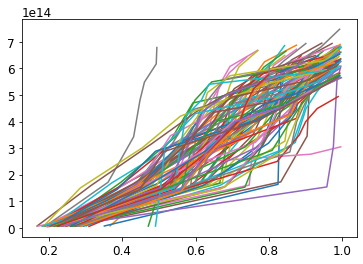

In [10]:
for i in range(96):
    plt.plot(scale_factor[:,i],fin_mass[i]*fracs)

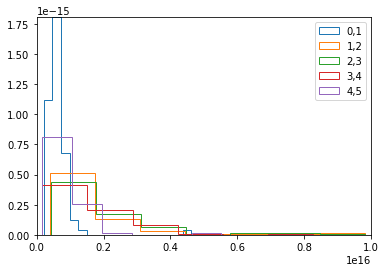

In [98]:
plt.hist(fin_mass*(fracs[1]-fracs[0])/(scale_factor[1,:]-scale_factor[0,:]),bins=40,histtype='step',label="0,1",density=True)
plt.hist(fin_mass*(fracs[2]-fracs[1])/(scale_factor[2,:]-scale_factor[1,:]),bins=40,histtype='step',label="1,2",density=True)
plt.hist(fin_mass*(fracs[3]-fracs[2])/(scale_factor[3,:]-scale_factor[2,:]),bins=40,histtype='step',label="2,3",density=True)
plt.hist(fin_mass*(fracs[4]-fracs[3])/(scale_factor[4,:]-scale_factor[3,:]),bins=40,histtype='step',label="3,4",density=True)
plt.hist(fin_mass*(fracs[5]-fracs[4])/(scale_factor[5,:]-scale_factor[4,:]),bins=40,histtype='step',label="4,5",density=True)
plt.legend()
plt.xlim(0e16,1e16)
plt.show()